In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/AUD_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222691, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,0.70137,0.70134,0.70127,0.70137
2020-01-01 17:05:00,0.70127,0.70111,0.70086,0.70139
2020-01-01 17:10:00,0.70113,0.70112,0.70093,0.70132
2020-01-01 17:15:00,0.70112,0.70088,0.70084,0.70126
2020-01-01 17:20:00,0.70088,0.70114,0.70078,0.70159


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222690, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,0.70137,0.70134,0.70127,0.70137,0.70111,17,2,1,0.00003,0.701320,0.00010,0.701337
2020-01-01 17:05:00,0.70127,0.70111,0.70086,0.70139,0.70112,17,2,1,0.00016,0.701125,0.00053,0.701157
2020-01-01 17:10:00,0.70113,0.70112,0.70093,0.70132,0.70088,17,2,1,0.00001,0.701125,0.00039,0.701125
2020-01-01 17:15:00,0.70112,0.70088,0.70084,0.70126,0.70114,17,2,1,0.00024,0.701050,0.00042,0.701025
2020-01-01 17:20:00,0.70088,0.70114,0.70078,0.70159,0.70095,17,2,1,-0.00026,0.701185,0.00081,0.701098


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,0.70137,0.70134,0.70127,0.70137,0.70111,17,2,1,0.00003,0.701320,0.00010,0.701337,-25.514782
2020-01-01 17:05:00,0.70127,0.70111,0.70086,0.70139,0.70112,17,2,1,0.00016,0.701125,0.00053,0.701157,-25.514755
2020-01-01 17:10:00,0.70113,0.70112,0.70093,0.70132,0.70088,17,2,1,0.00001,0.701125,0.00039,0.701125,-25.514751
2020-01-01 17:15:00,0.70112,0.70088,0.70084,0.70126,0.70114,17,2,1,0.00024,0.701050,0.00042,0.701025,-25.514746
2020-01-01 17:20:00,0.70088,0.70114,0.70078,0.70159,0.70095,17,2,1,-0.00026,0.701185,0.00081,0.701098,-25.514757


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  0.70137  0.70127  0.70137         0.70111    17    2   
2020-01-01 17:05:00  0.70127  0.70086  0.70139         0.70112    17    2   
2020-01-01 17:10:00  0.70113  0.70093  0.70132         0.70088    17    2   
2020-01-01 17:15:00  0.70112  0.70084  0.70126         0.70114    17    2   
2020-01-01 17:20:00  0.70088  0.70078  0.70159         0.70095    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00003   0.701320  0.00010    0.701337 -25.514782  
2020-01-01 17:05:00     1   0.00016   0.701125  0.00053    0.701157 -25.514755  
2020-01-01 17:10:00     1   0.00001   0.701125  0.00039    0.701125 -25.514751  
2020-01-01 17:15:00     1   0.00024   0.701050  0.00042

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_5Min(X,y)

178152
178152
22000
22000
22538
22538


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(178152, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(178127, 24, 12)
(21975, 24, 12)
(22513, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(178127, 1)
(21975, 1)
(22513, 1)


array([[0.60305166],
       [0.6032524 ],
       [0.60252976],
       ...,
       [0.632082  ],
       [0.63103795],
       [0.63147974]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.60305166, 0.6032524 , 0.60252976, ..., 0.632082  , 0.63103795,
       0.63147974], dtype=float32)

In [ ]:
y_train

array([0.60305166, 0.6032524 , 0.60252976, ..., 0.632082  , 0.63103795,
       0.63147974], dtype=float32)

In [ ]:
TargetIndex = df.columns.tolist().index('close')
HighIndex = df.columns.tolist().index('high')
LowIndex = df.columns.tolist().index('low')

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          197632    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 2.5430e-04 - mae: 0.0062 - mse: 2.5430e-04 - root_mean_squared_error: 0.0159 - mape: 395.5540
Epoch 1: val_mse improved from inf to 0.00021, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM.hdf5
463/463 [==============================] - 20s 29ms/step - loss: 2.5430e-04 - mae: 0.0062 - mse: 2.5430e-04 - root_mean_squared_error: 0.0159 - mape: 395.5540 - val_loss: 2.0779e-04 - val_mae: 0.0107 - val_mse: 2.0779e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 2825.6865
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 1.6867e-05 - mae: 0.0031 - mse: 1.6867e-05 - root_mean_squared_error: 0.0041 - mape: 346.6428
Epoch 2: val_mse improved from 0.00021 to 0.00019, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM.hdf5
463/463 [==============================] - 9s 20ms/step - loss: 1.6867e-05 - mae: 0.0031 - mse: 1.6867e-05 - root_mean_squared_e

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.011061842553317547
0.013772375881671906
687/687 [==============================] - 6s 6ms/step
0.9941686388359463


In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/2
462/463 [============================>.] - ETA: 0s - loss: 2.0748e-04 - mae: 0.0053 - mse: 2.0748e-04 - root_mean_squared_error: 0.0144 - mape: 125.4272
Epoch 1: val_mse did not improve from 0.00016
463/463 [==============================] - 16s 22ms/step - loss: 2.0719e-04 - mae: 0.0053 - mse: 2.0719e-04 - root_mean_squared_error: 0.0144 - mape: 125.2469 - val_loss: 2.1870e-04 - val_mae: 0.0122 - val_mse: 2.1870e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 1245.3176 - lr: 0.0010
Epoch 2/2
463/463 [==============================] - ETA: 0s - loss: 6.8197e-06 - mae: 0.0020 - mse: 6.8197e-06 - root_mean_squared_error: 0.0026 - mape: 153.1727
Epoch 2: val_mse did not improve from 0.00016
463/463 [==============================] - 9s 19ms/step - loss: 6.8197e-06 - mae: 0.0020 - mse: 6.8197e-06 - root_mean_squared_error: 0.0026 - mape: 153.1727 - val_loss: 2.0720e-04 - val_mae: 0.0118 - val_mse: 2.0720e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 1084.4634 - lr: 

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.011750287376344204
0.014394475147128105
687/687 [==============================] - 5s 6ms/step
0.9953888561413446


687/687 [==============================] - 4s 6ms/step


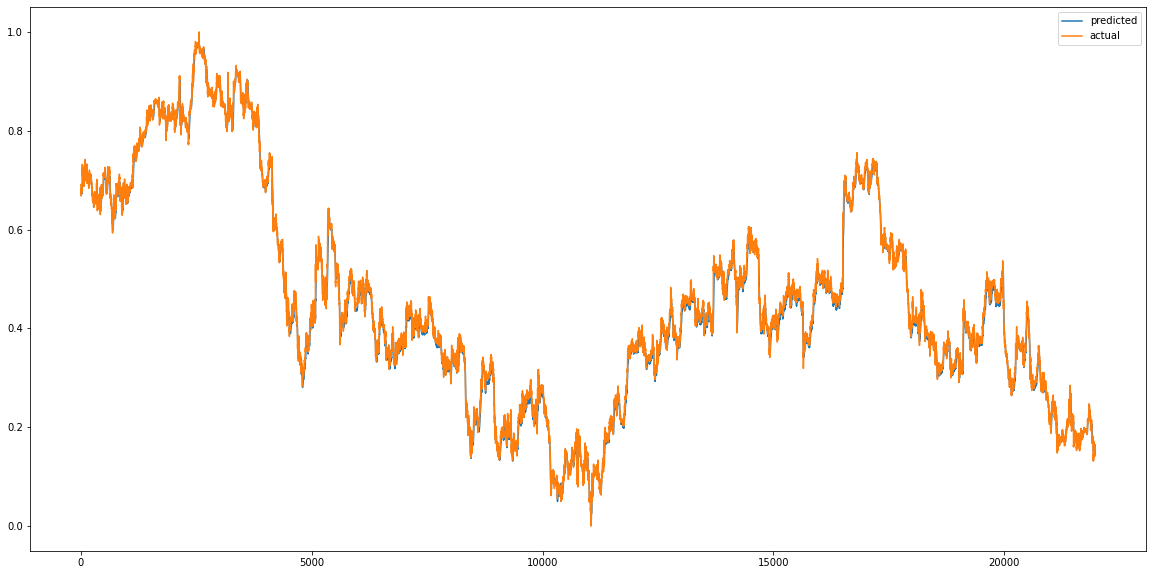

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


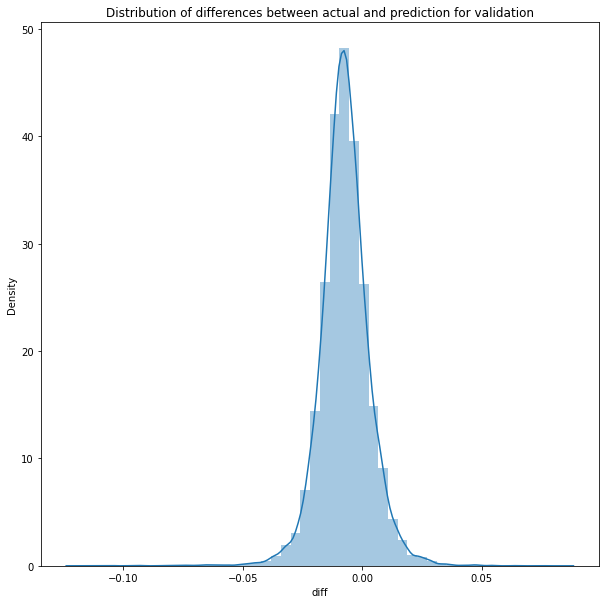

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 4s 6ms/step


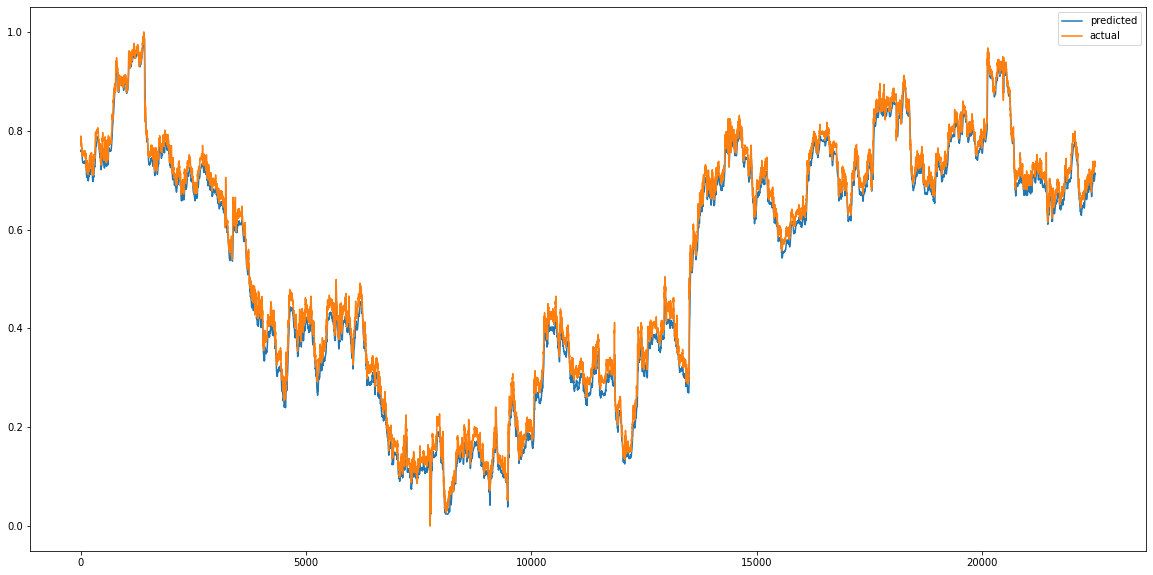

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


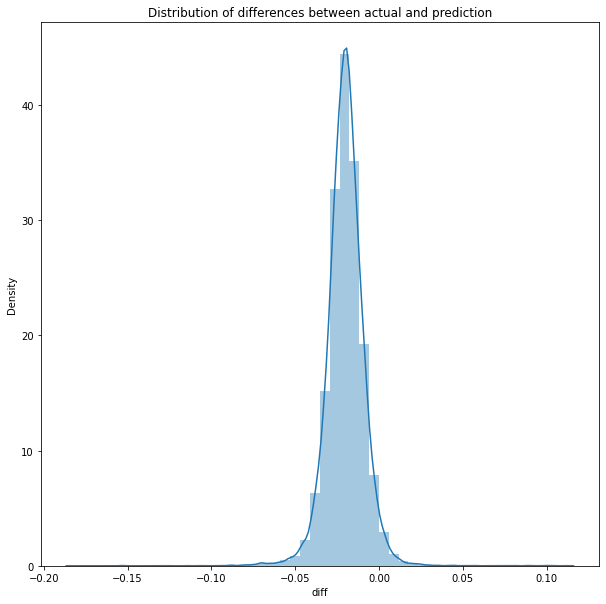

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0005315822163734067
MAE :  0.02058243603386309
RMSE  : 0.023056066801894176
704/704 [==============================] - 4s 6ms/step
R2_Score  : 0.9912977628261117


count    22513.000000
mean        -0.020093
std          0.011308
min         -0.182088
25%         -0.026072
50%         -0.020038
75%         -0.013902
max          0.111451
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 gru (GRU)                   (None, 24, 256)           247296    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                61824     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 288.6644 - mae: 2.2156 - mse: 288.6643 - root_mean_squared_error: 16.9901 - mape: 4234.7329
Epoch 1: val_mse improved from inf to 0.01704, saving model to weights.best.hdf5
463/463 [==============================] - 181s 383ms/step - loss: 288.6644 - mae: 2.2156 - mse: 288.6643 - root_mean_squared_error: 16.9901 - mape: 4234.7329 - val_loss: 0.0170 - val_mae: 0.0899 - val_mse: 0.0170 - val_root_mean_squared_error: 0.1306 - val_mape: 20422.6855
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.0018 - mae: 0.0221 - mse: 0.0018 - root_mean_squared_error: 0.0426 - mape: 2197.7681
Epoch 2: val_mse improved from 0.01704 to 0.00715, saving model to weights.best.hdf5
463/463 [==============================] - 179s 386ms/step - loss: 0.0018 - mae: 0.0221 - mse: 0.0018 - root_mean_squared_error: 0.0426 - mape: 2197.7681 - val_loss: 0.0071 - val_mae: 0.0552 - val_mse: 0.0071 - val_root_mean_squared_error: 

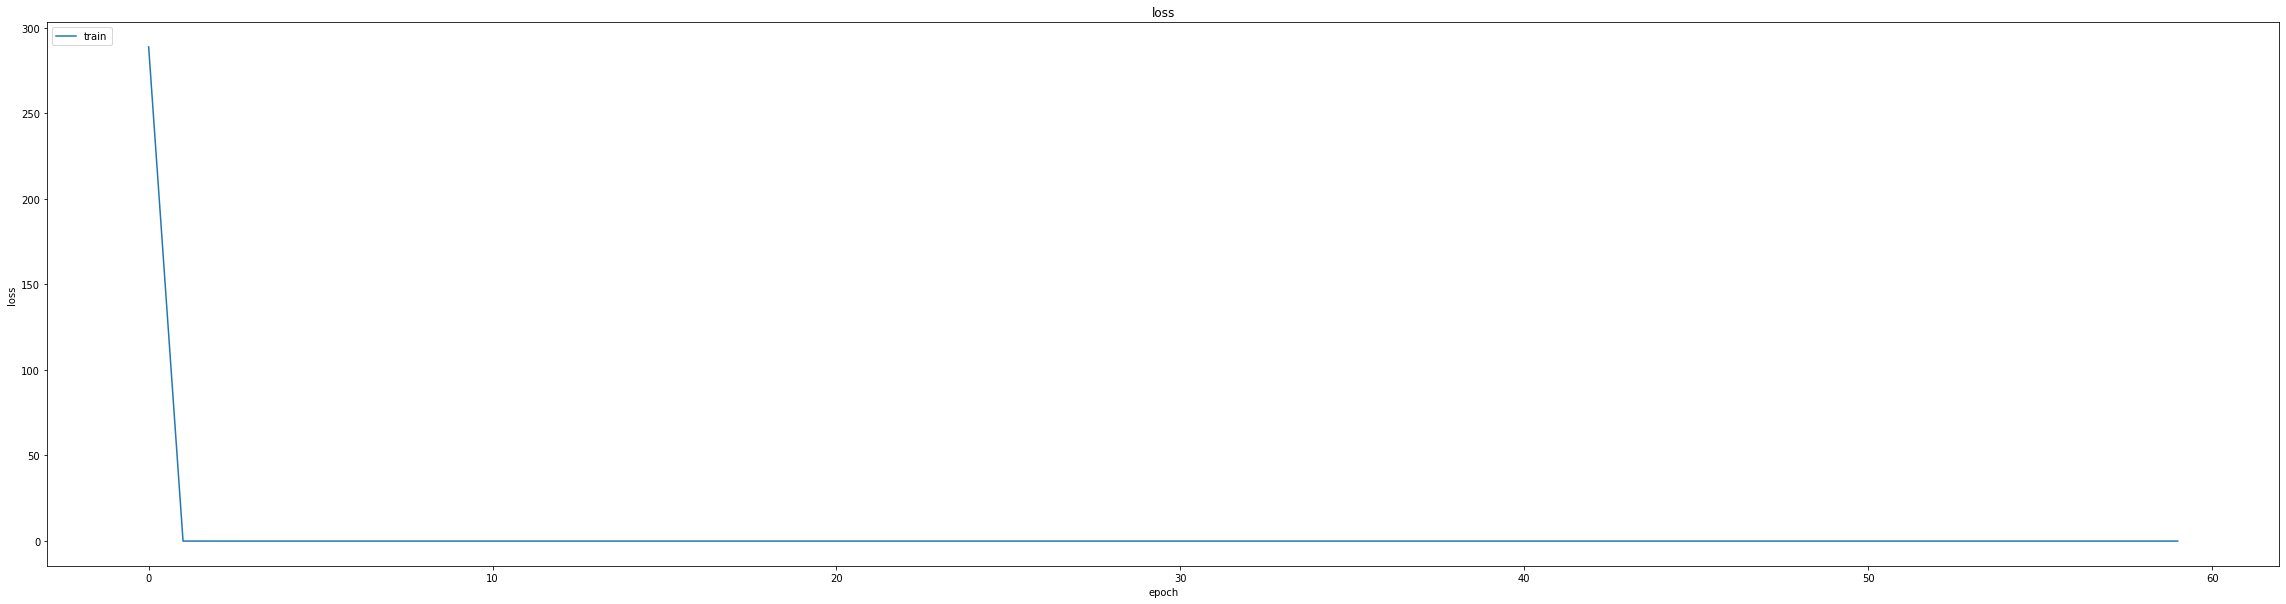

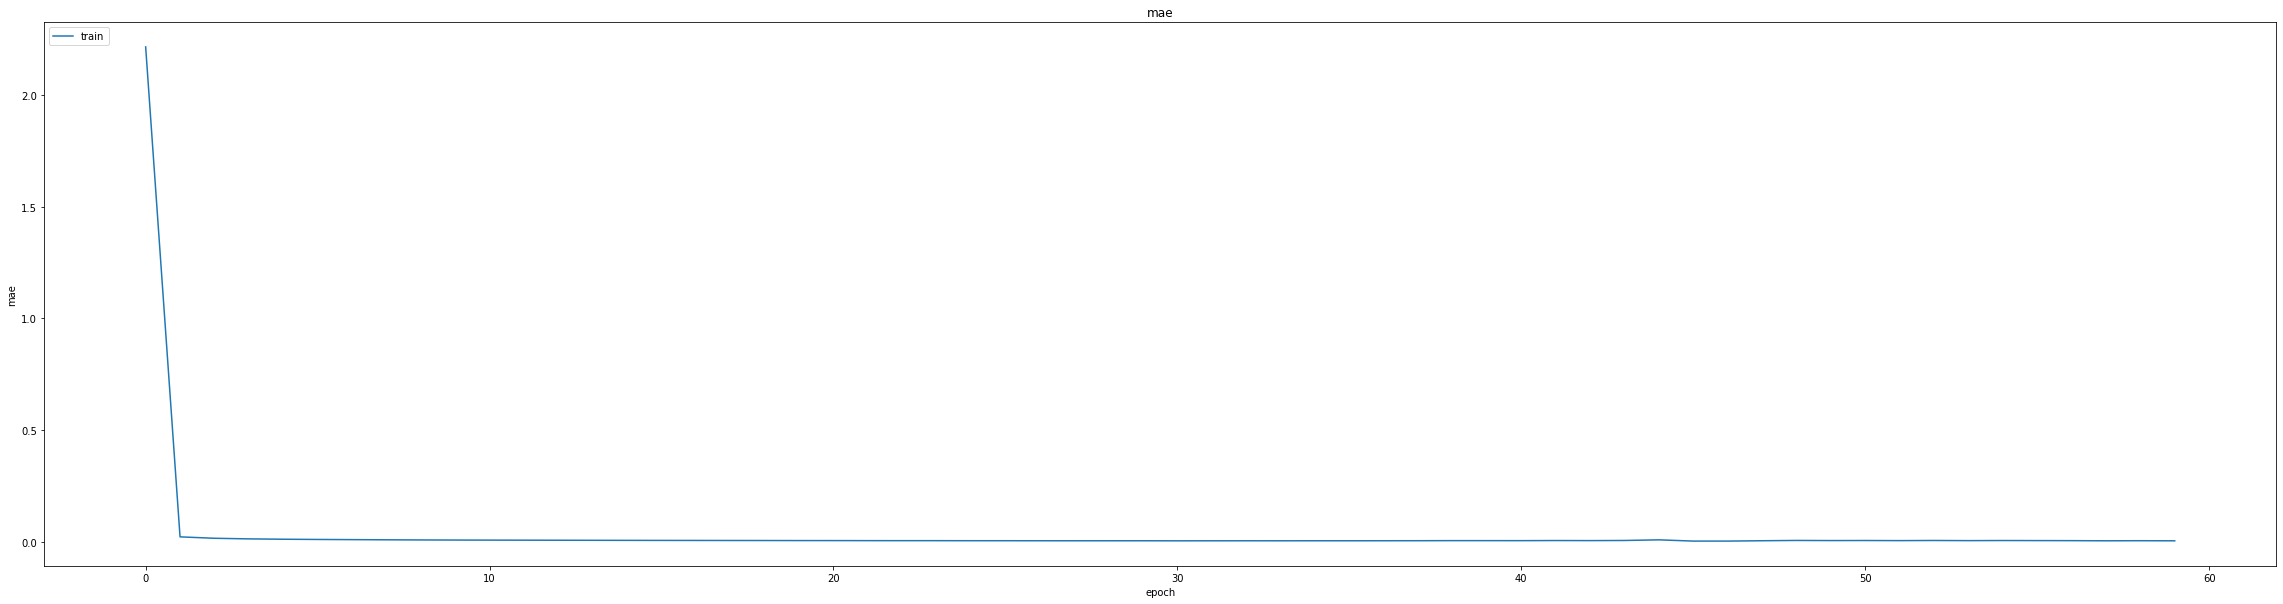

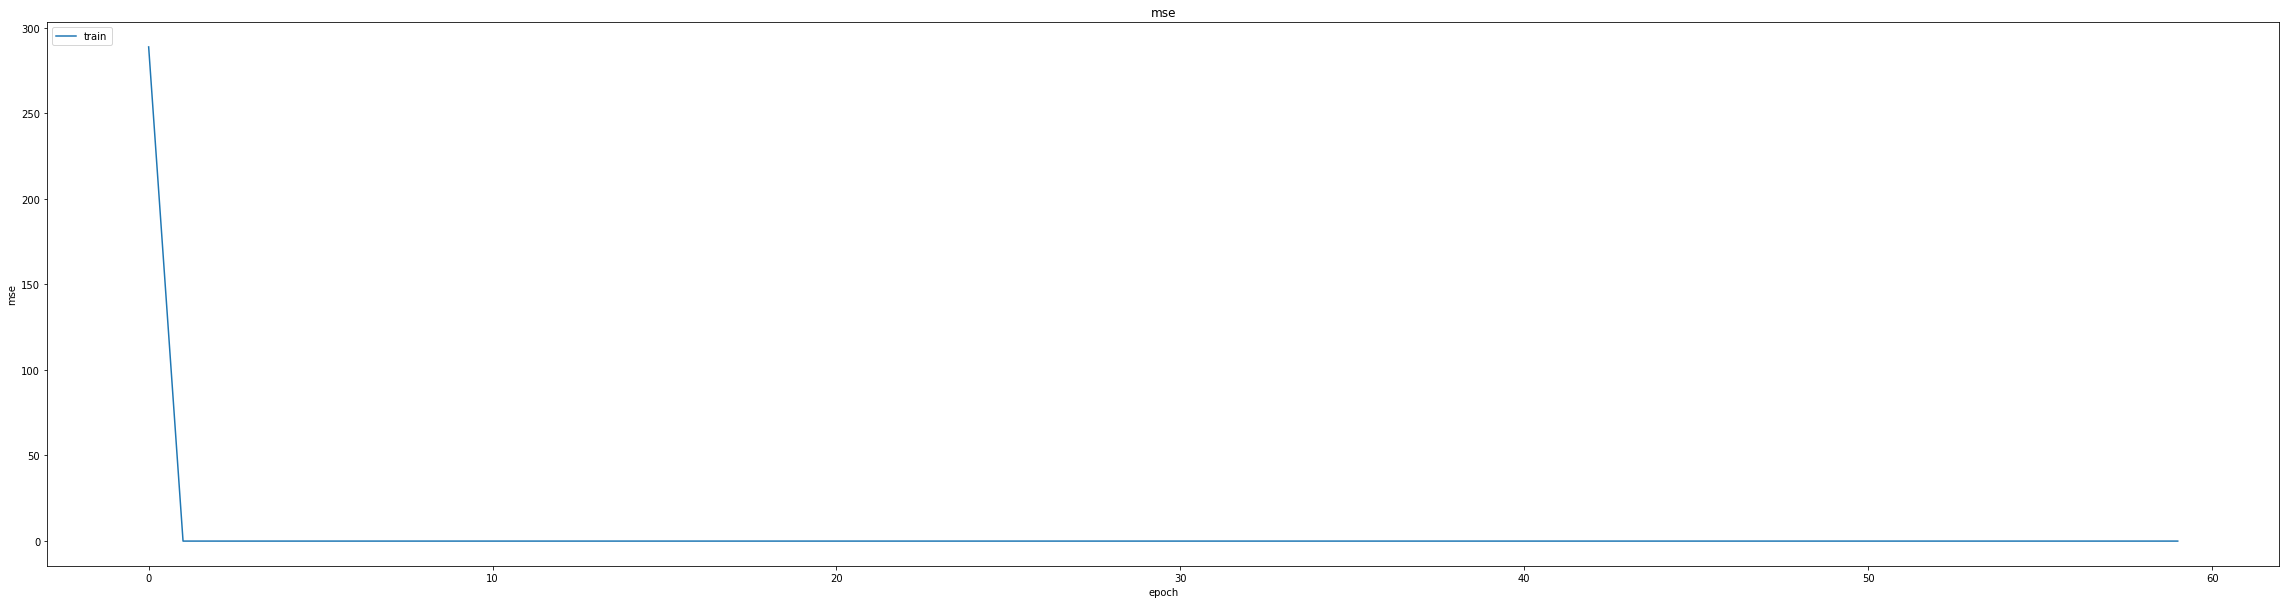

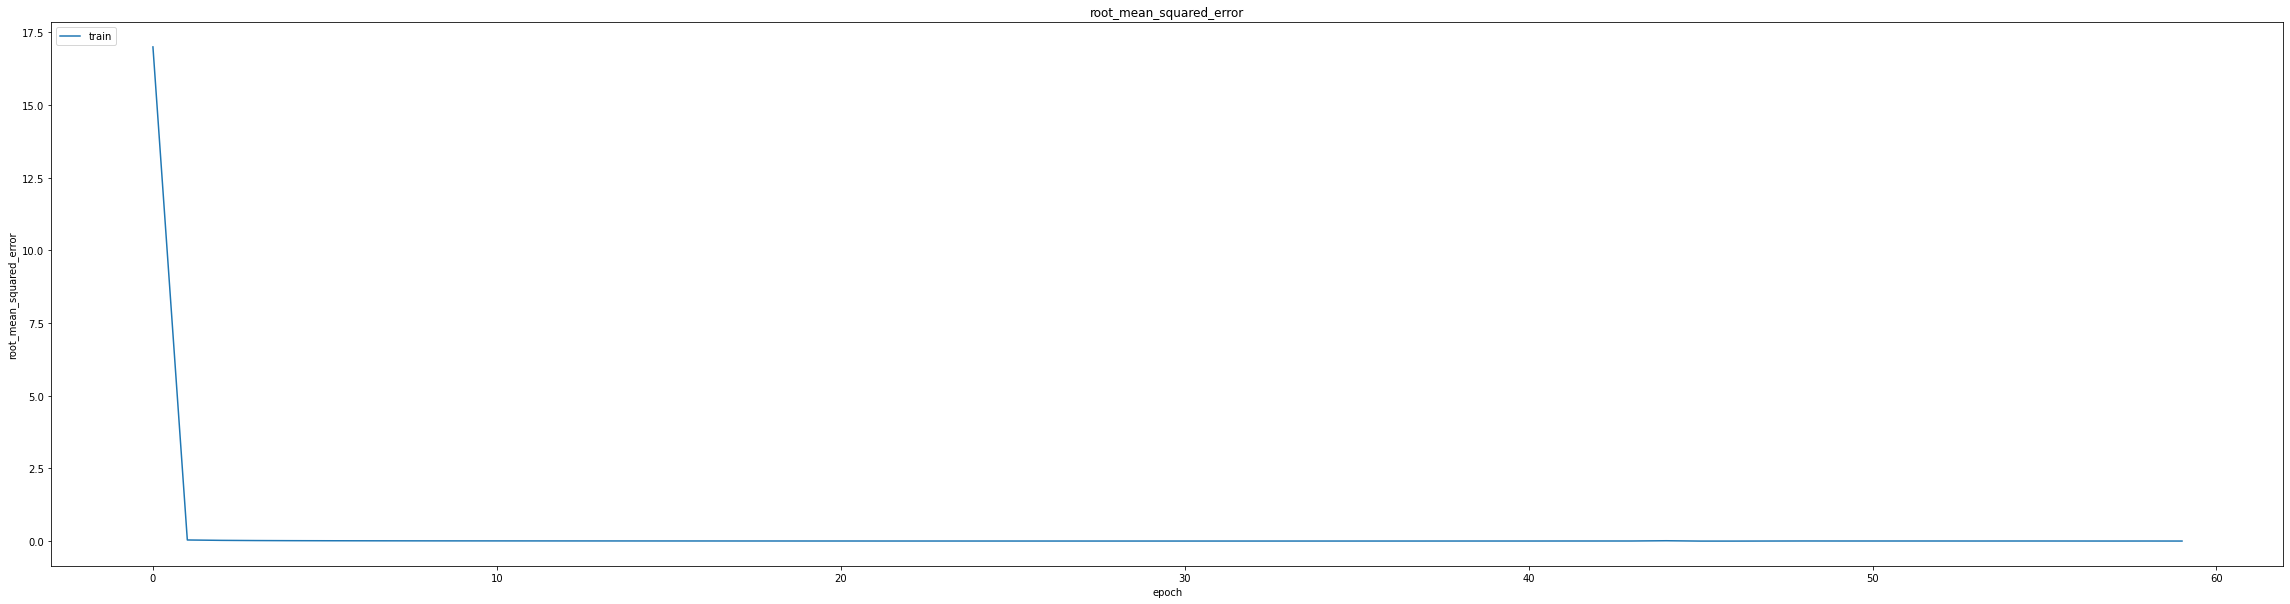

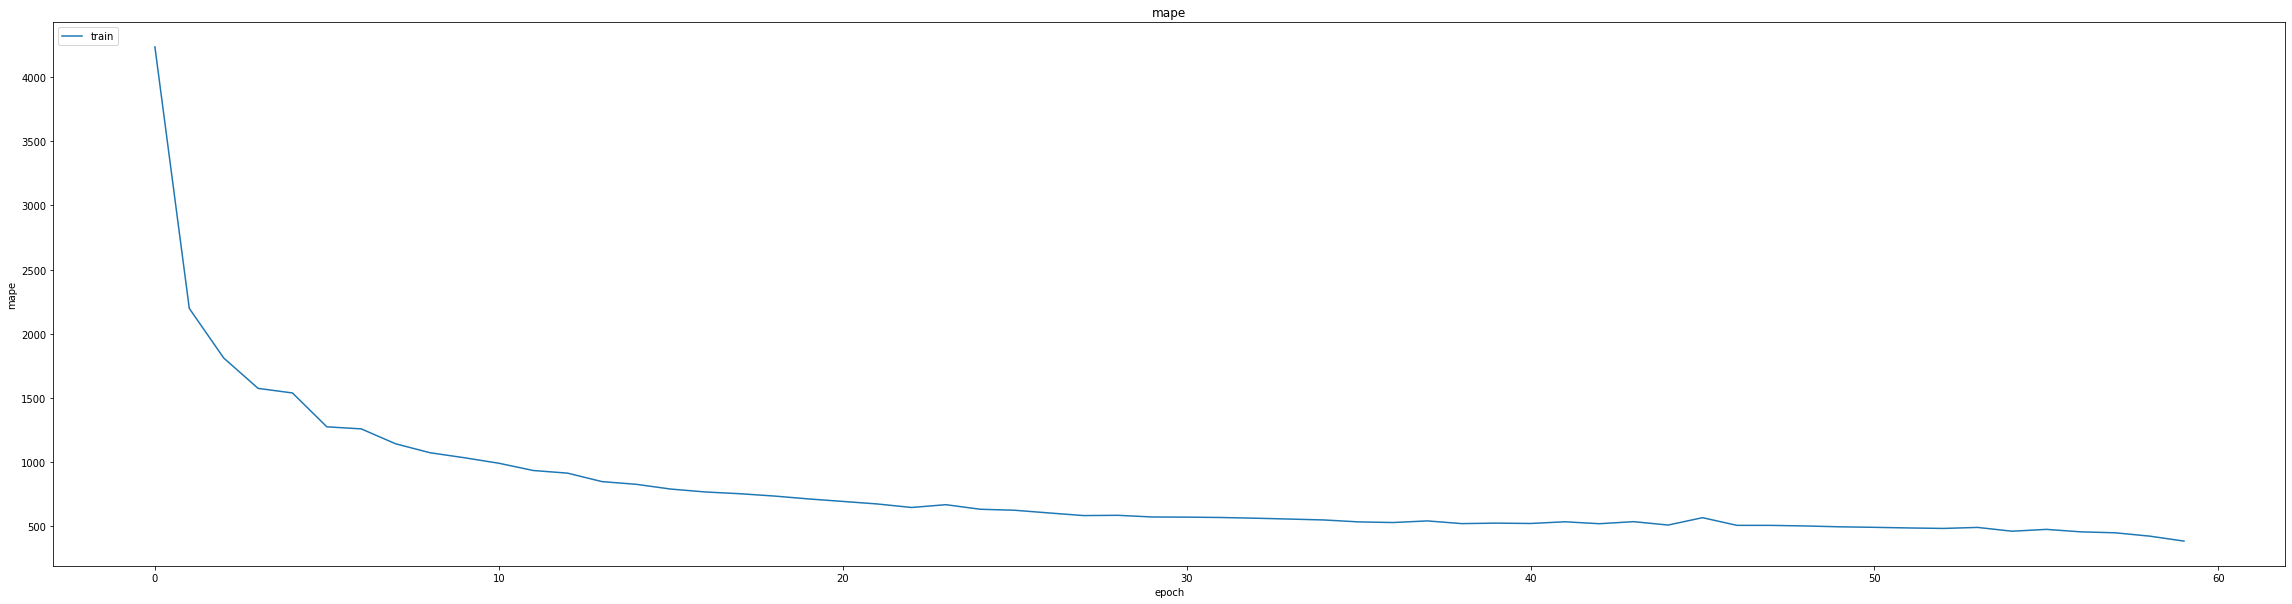

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.016904370859265327
0.021308107301592827
687/687 [==============================] - 15s 20ms/step
0.9778778409276093


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=12)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 5.6004e-04 - mae: 0.0093 - mse: 5.6004e-04 - root_mean_squared_error: 0.0237 - mape: 551.8440
Epoch 1: val_mse did not improve from 0.00045
463/463 [==============================] - 189s 401ms/step - loss: 5.6004e-04 - mae: 0.0093 - mse: 5.6004e-04 - root_mean_squared_error: 0.0237 - mape: 551.8440 - val_loss: 6.8840e-04 - val_mae: 0.0219 - val_mse: 6.8840e-04 - val_root_mean_squared_error: 0.0262 - val_mape: 4519.0464 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 2.8954e-05 - mae: 0.0040 - mse: 2.8954e-05 - root_mean_squared_error: 0.0054 - mape: 541.7637
Epoch 2: val_mse did not improve from 0.00045
463/463 [==============================] - 186s 401ms/step - loss: 2.8954e-05 - mae: 0.0040 - mse: 2.8954e-05 - root_mean_squared_error: 0.0054 - mape: 541.7637 - val_loss: 6.2265e-04 - val_mae: 0.0205 - val_mse: 6.2265e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 4300.8145

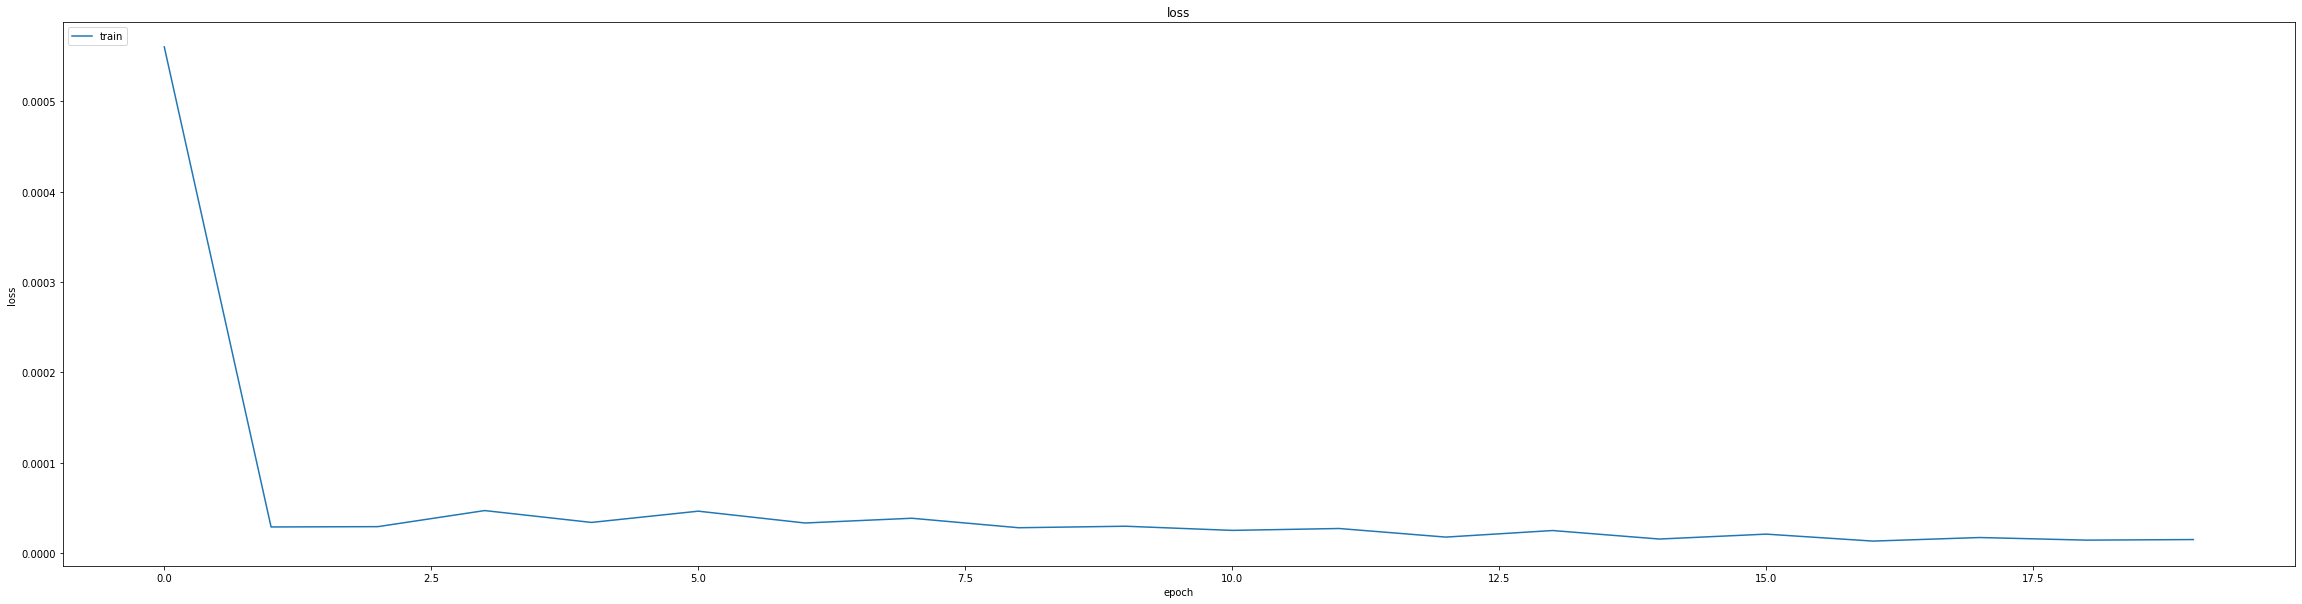

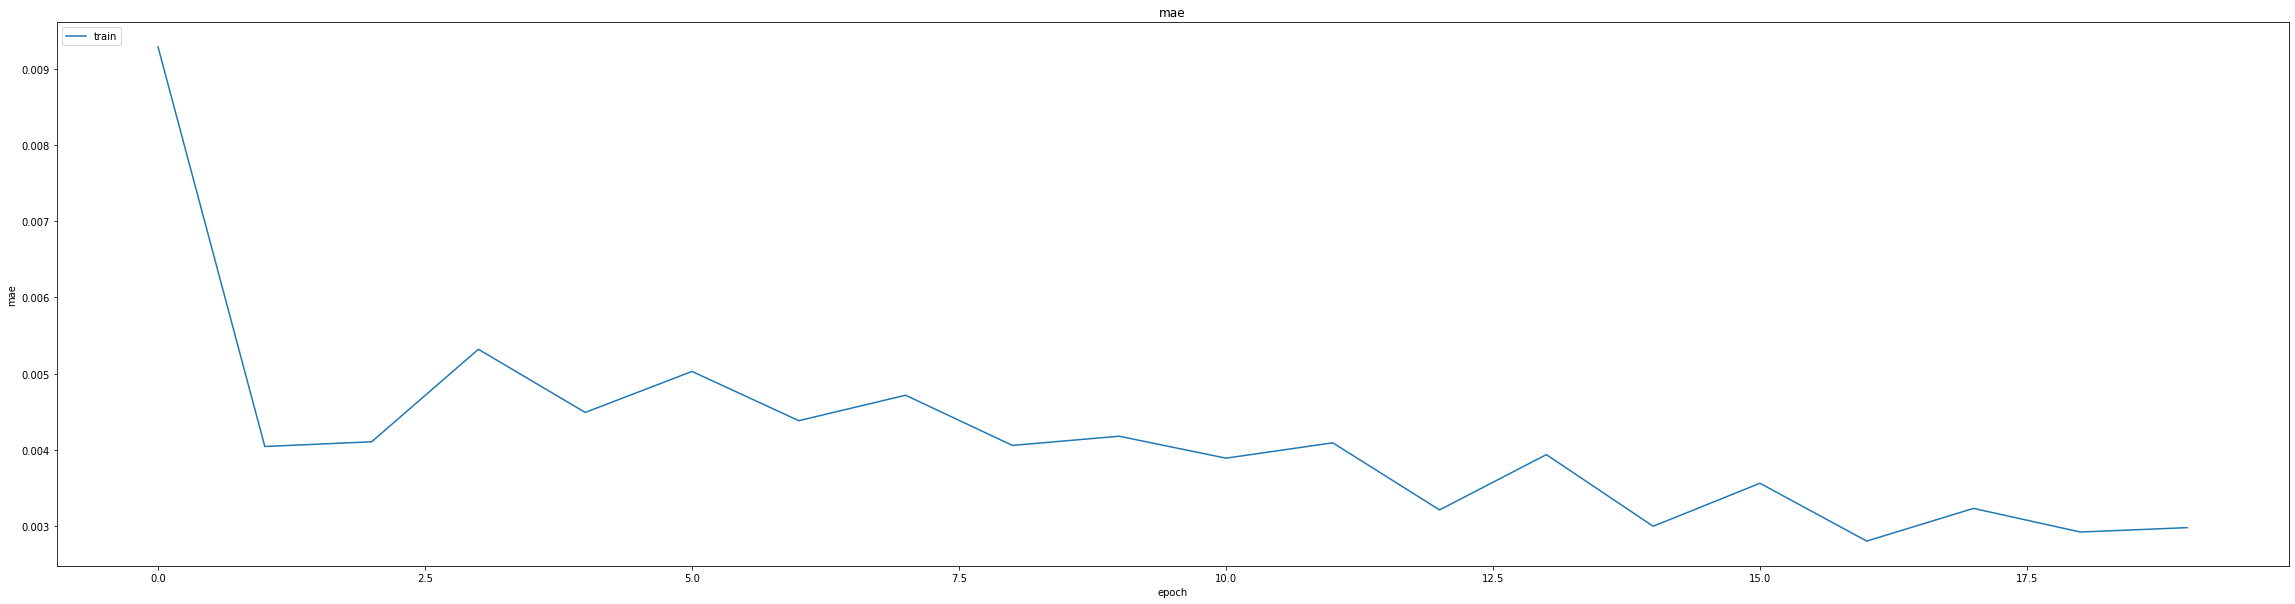

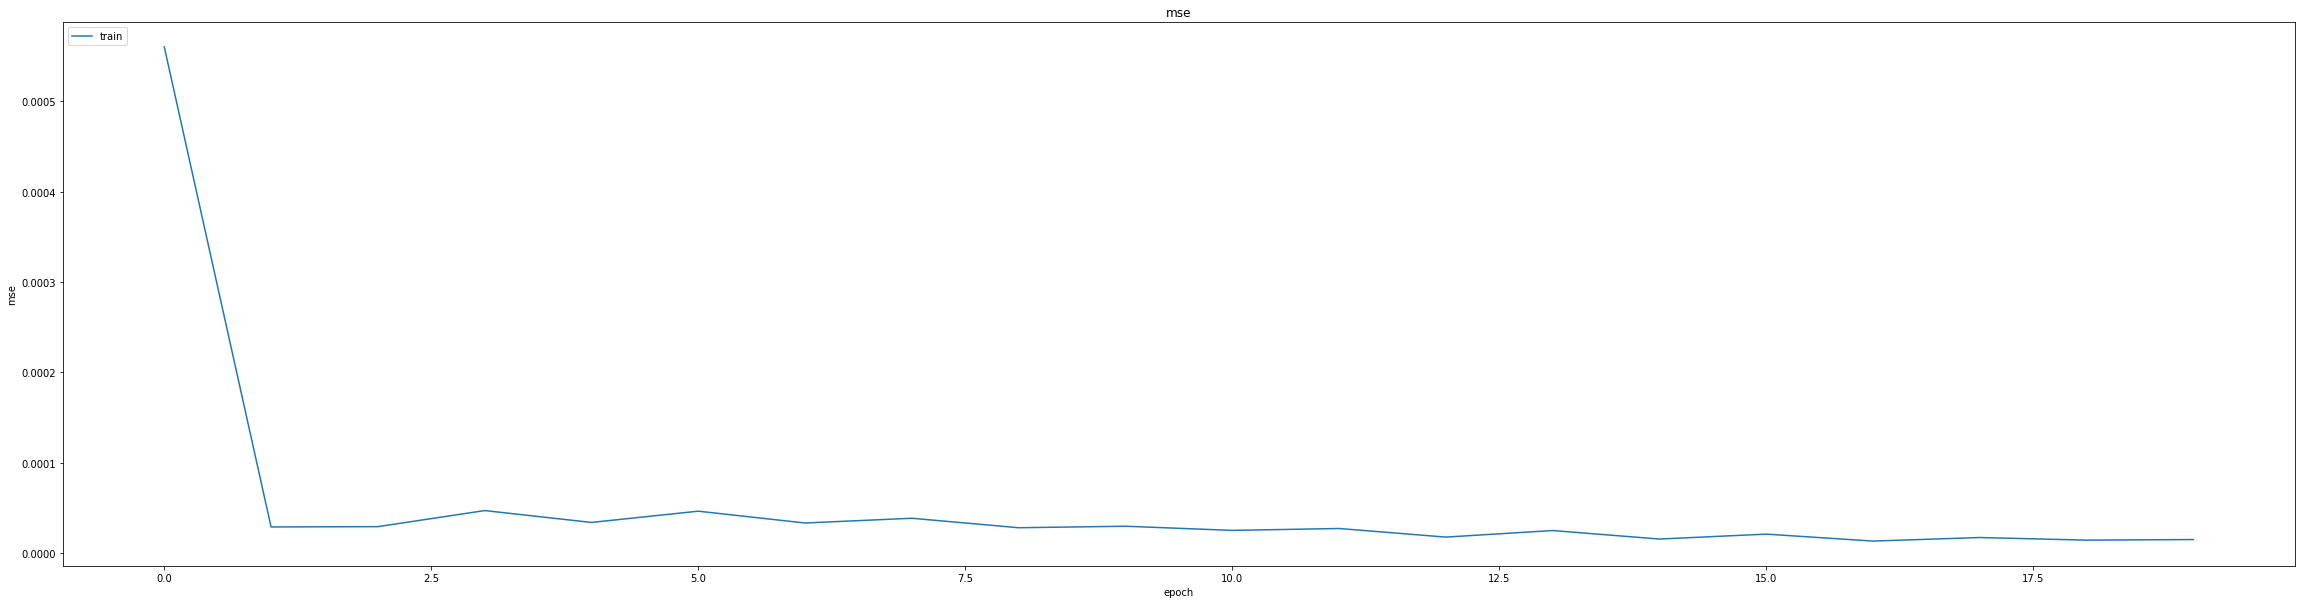

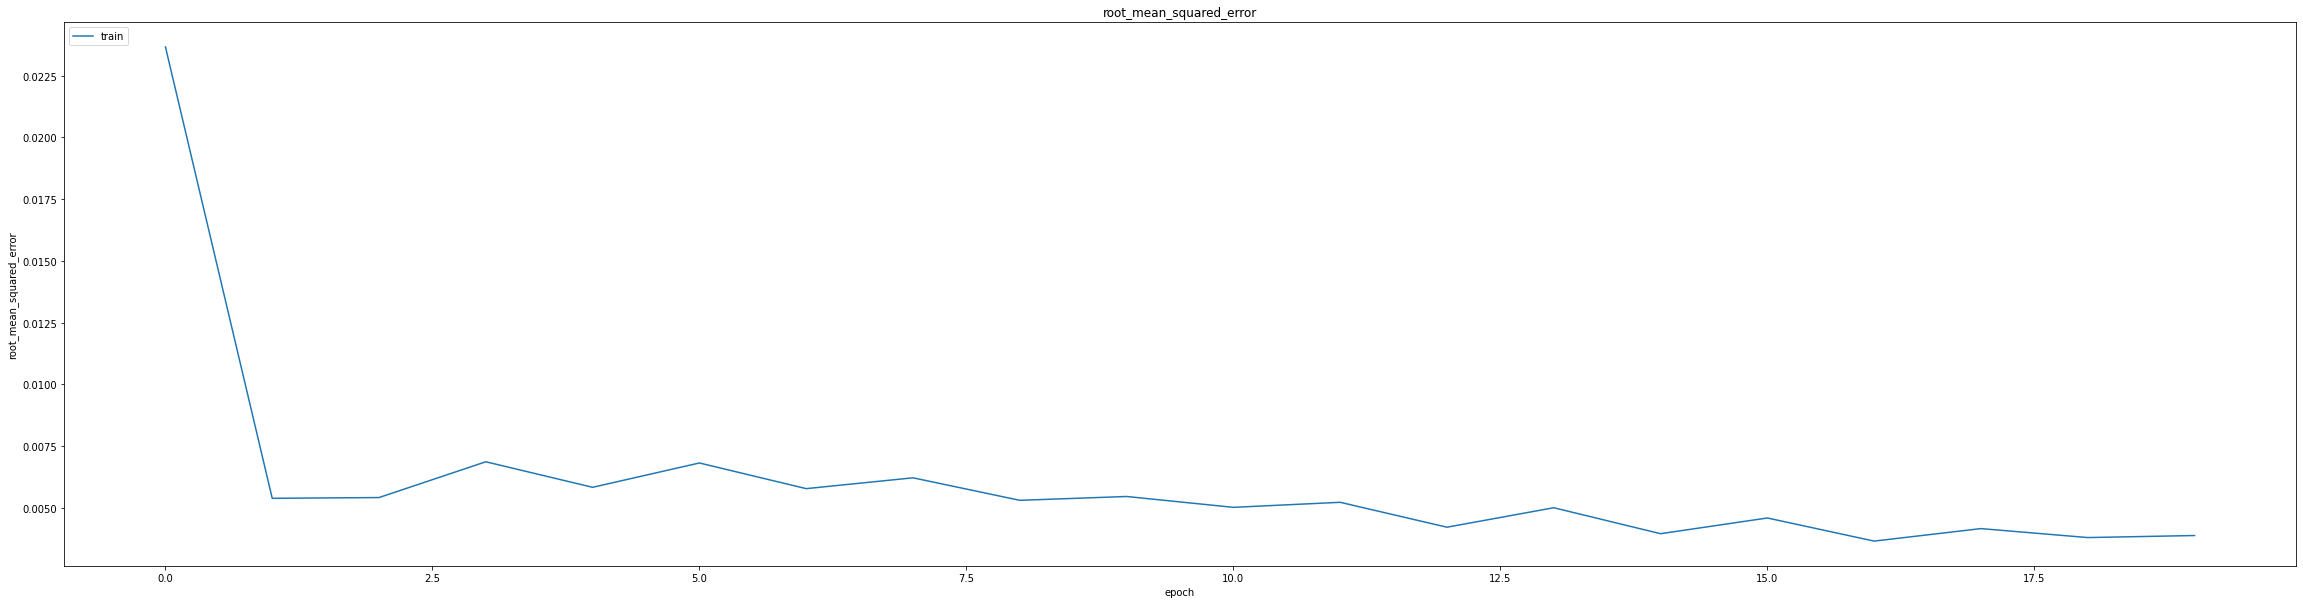

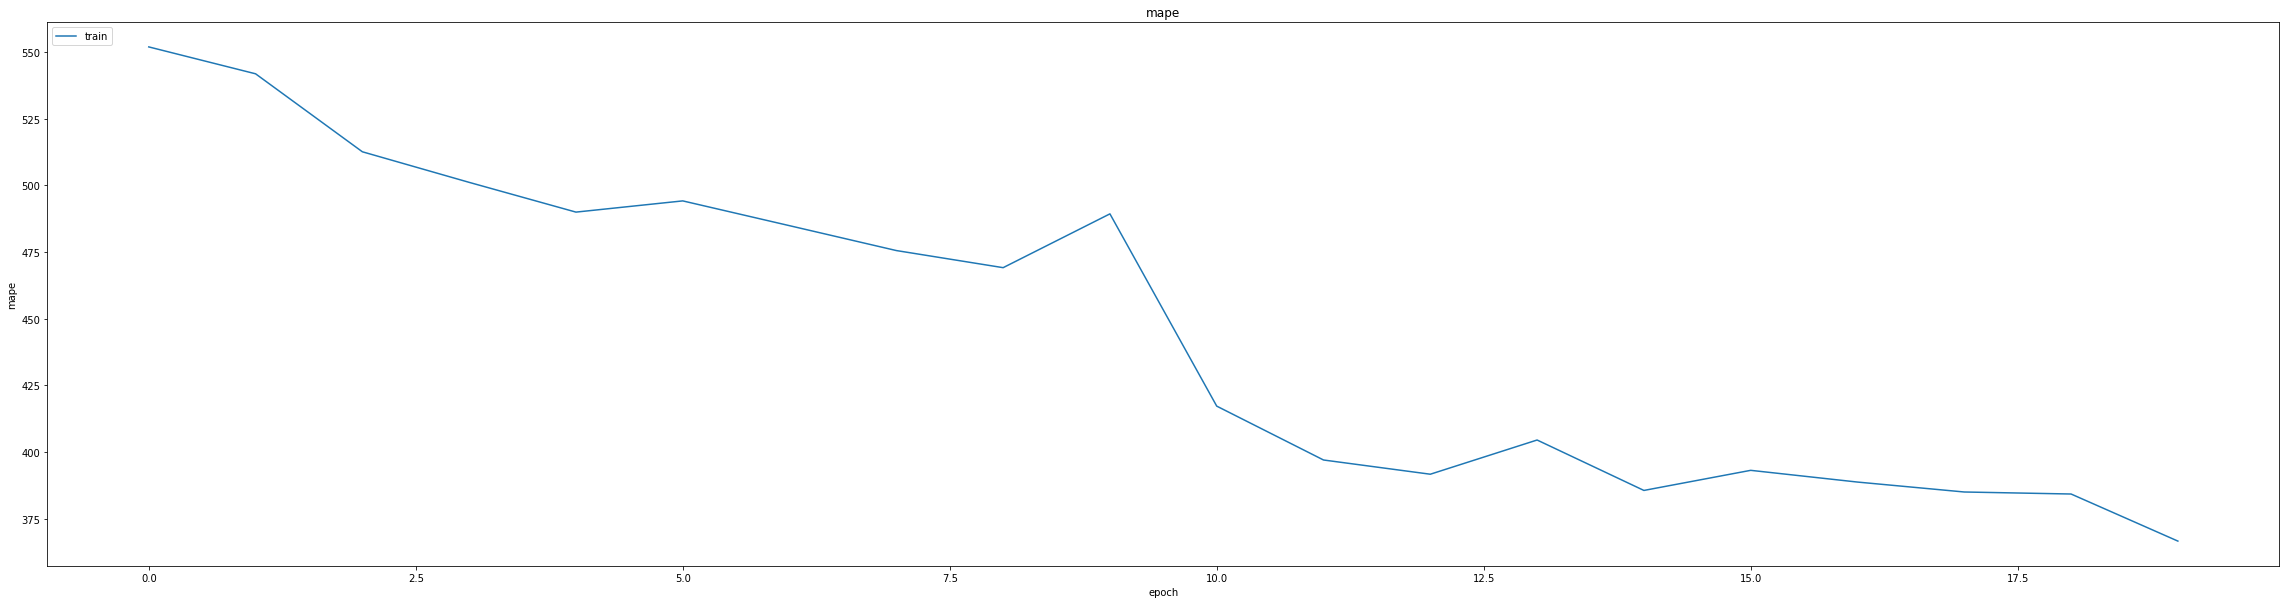

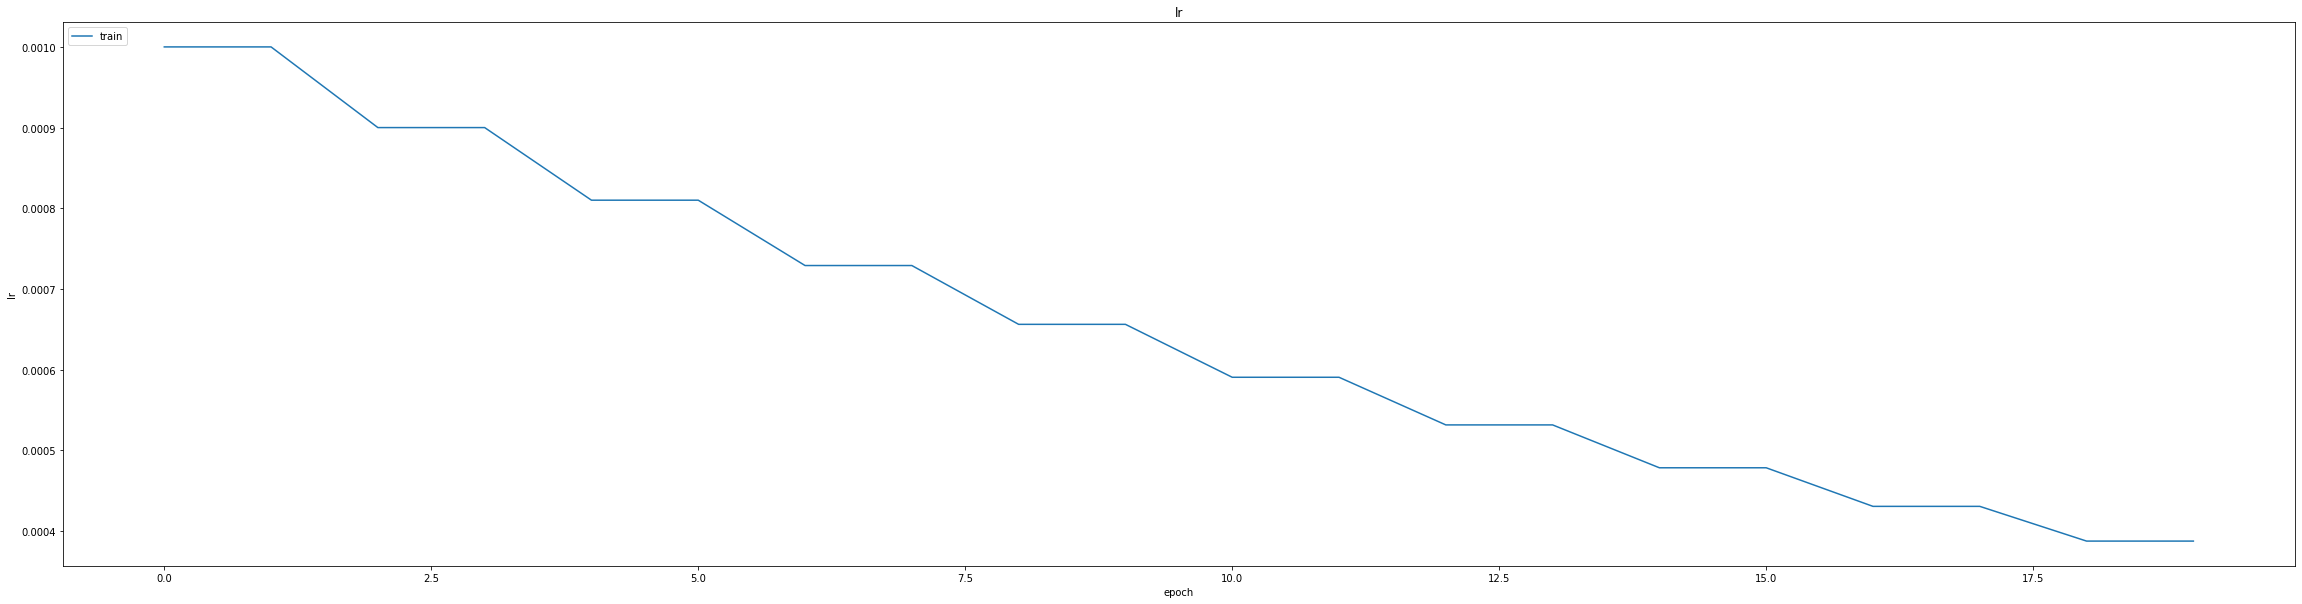

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01922529749572277
0.023416435346007347
687/687 [==============================] - 21s 29ms/step
0.982969653469277


687/687 [==============================] - 17s 25ms/step


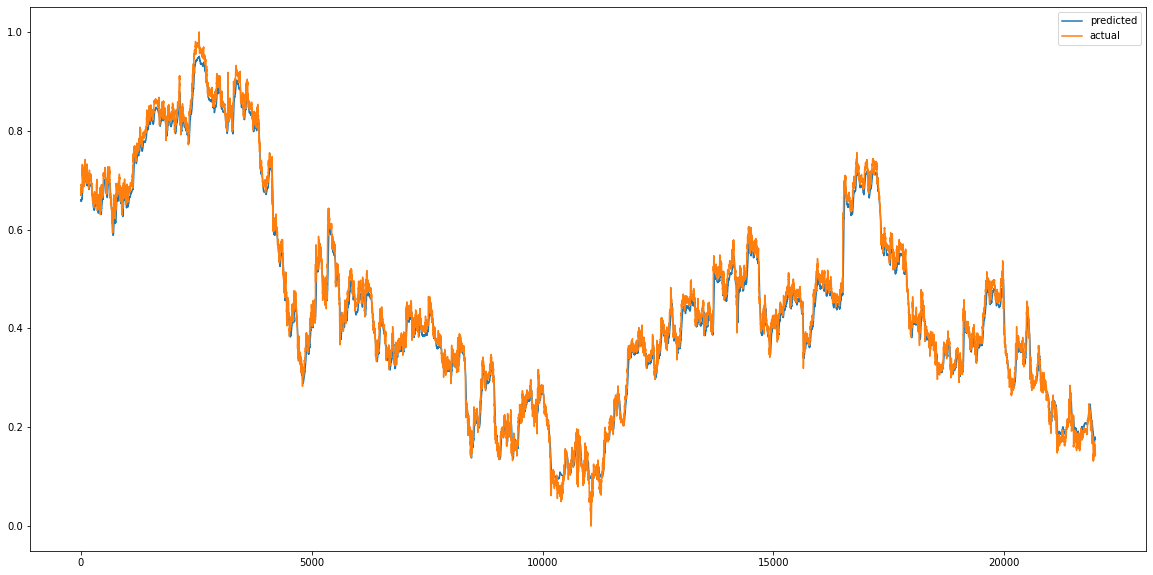

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


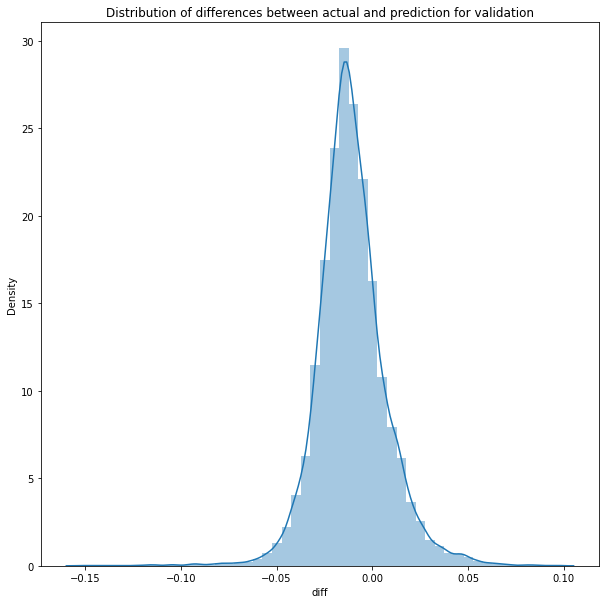

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 14s 20ms/step


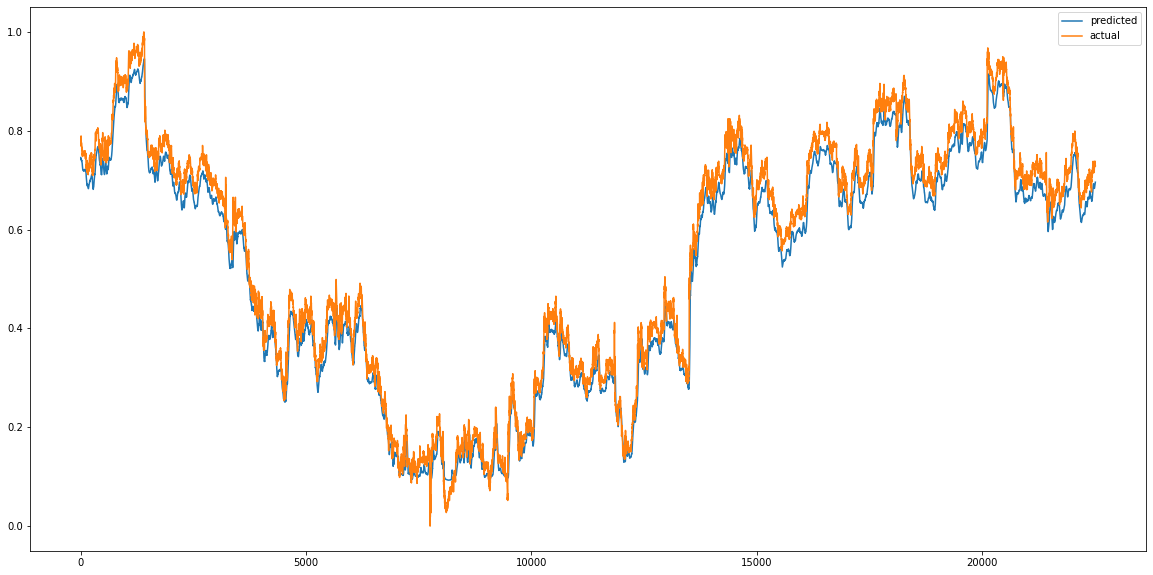

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


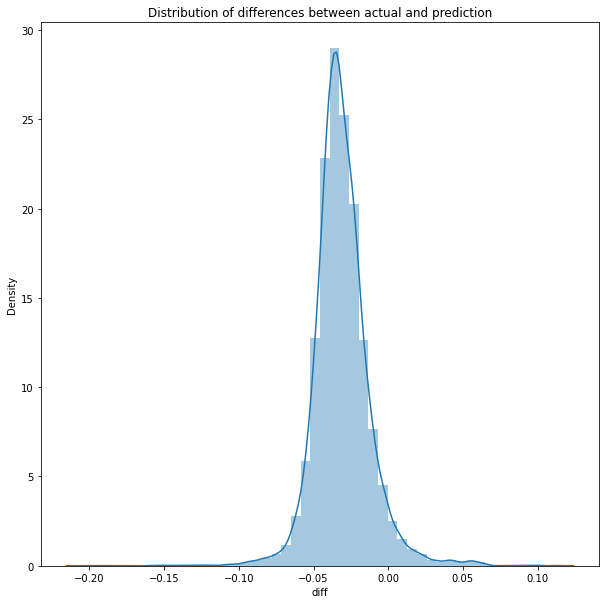

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.001317388405039739
MAE :  0.032716036822825735
RMSE  : 0.036295845561713246
704/704 [==============================] - 14s 20ms/step
R2_Score  : 0.9784337662273658


count    22513.000000
mean        -0.031006
std          0.018868
min         -0.207870
25%         -0.041326
50%         -0.032576
75%         -0.022048
max          0.116466
Name: diff, dtype: float64

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           328704    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 173.8046 - mae: 1.4952 - mse: 173.8046 - root_mean_squared_error: 13.1835 - mape: 3606.3884
Epoch 1: val_mse improved from inf to 0.06637, saving model to weights.best.hdf5
463/463 [==============================] - 241s 513ms/step - loss: 173.8046 - mae: 1.4952 - mse: 173.8046 - root_mean_squared_error: 13.1835 - mape: 3606.3884 - val_loss: 0.0664 - val_mae: 0.2267 - val_mse: 0.0664 - val_root_mean_squared_error: 0.2576 - val_mape: 26639.6621
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.0217 - mae: 0.1149 - mse: 0.0217 - root_mean_squared_error: 0.1472 - mape: 3134.6885
Epoch 2: val_mse improved from 0.06637 to 0.04648, saving model to weights.best.hdf5
463/463 [==============================] - 234s 506ms/step - loss: 0.0217 - mae: 0.1149 - mse: 0.0217 - root_mean_squared_error: 0.1472 - mape: 3134.6885 - val_loss: 0.0465 - val_mae: 0.1848 - val_mse: 0.0465 - val_root_mean_squared_error: 

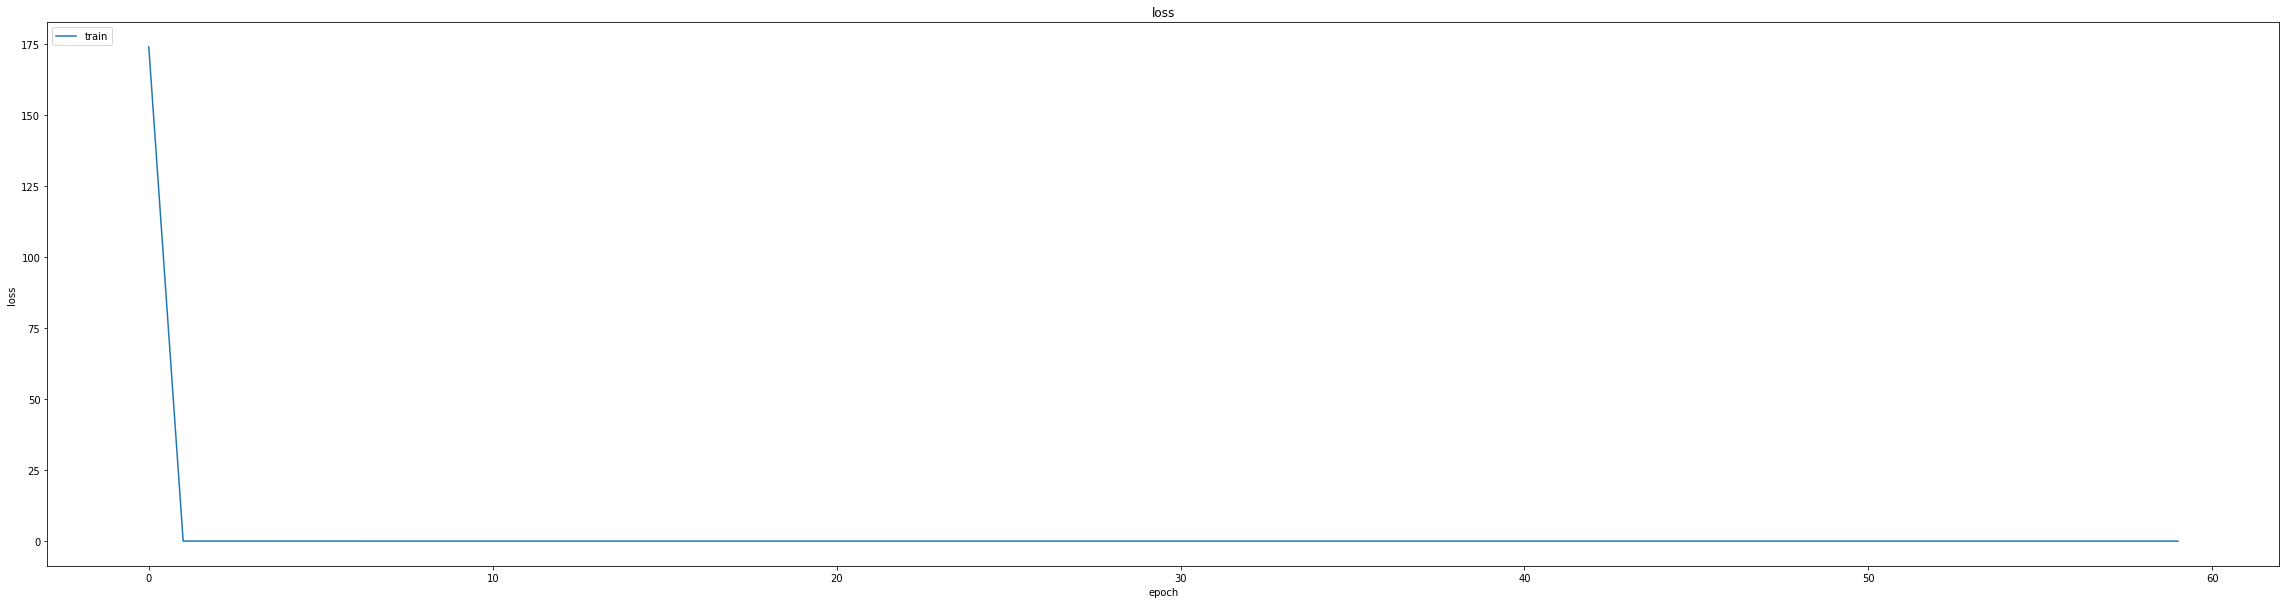

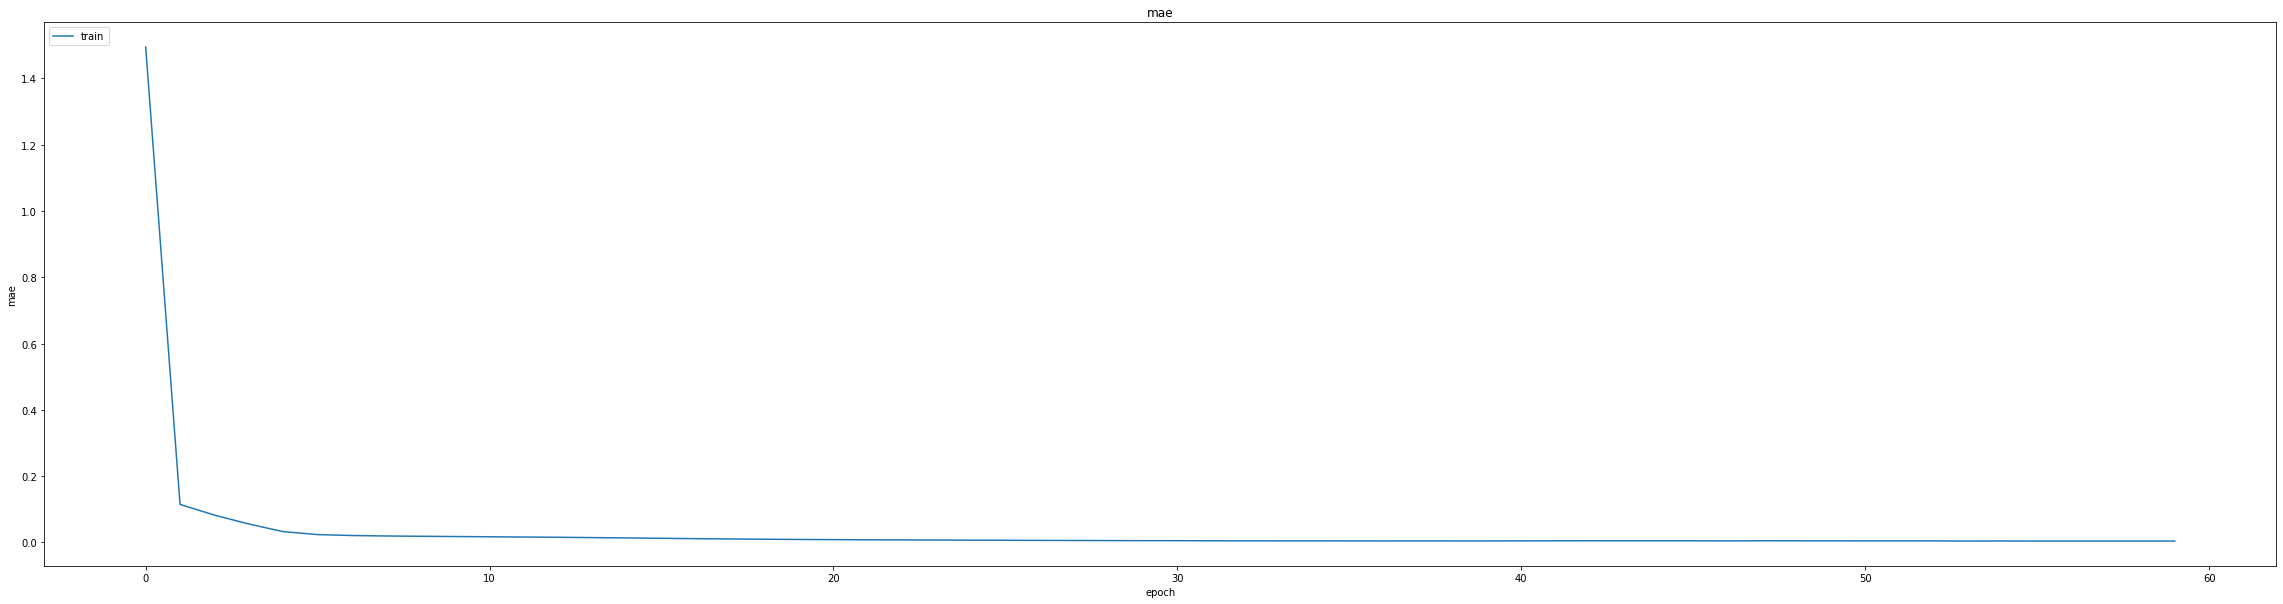

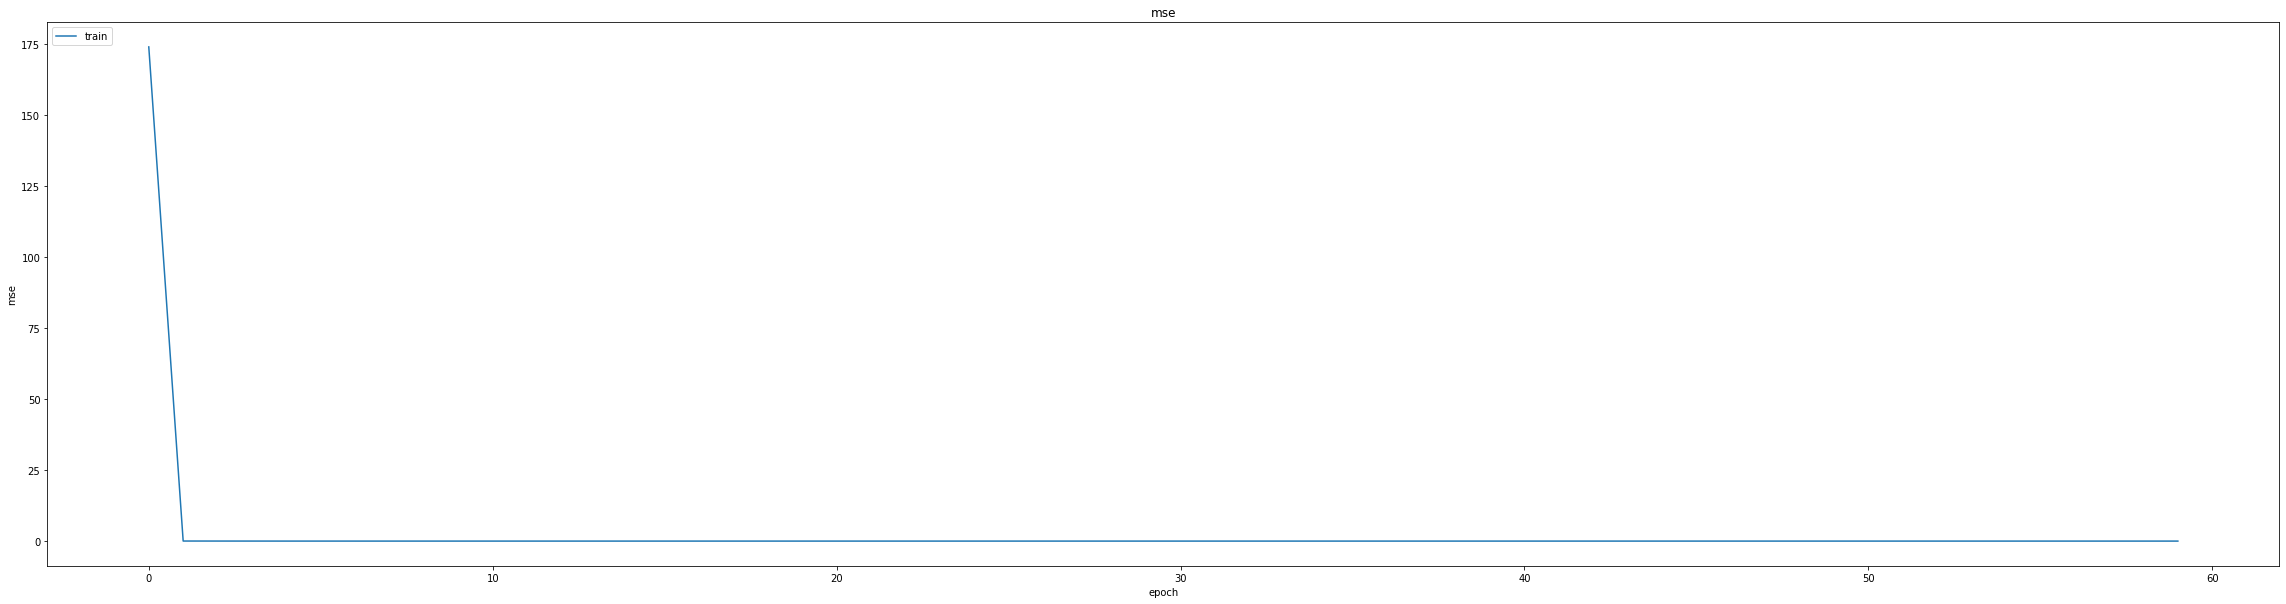

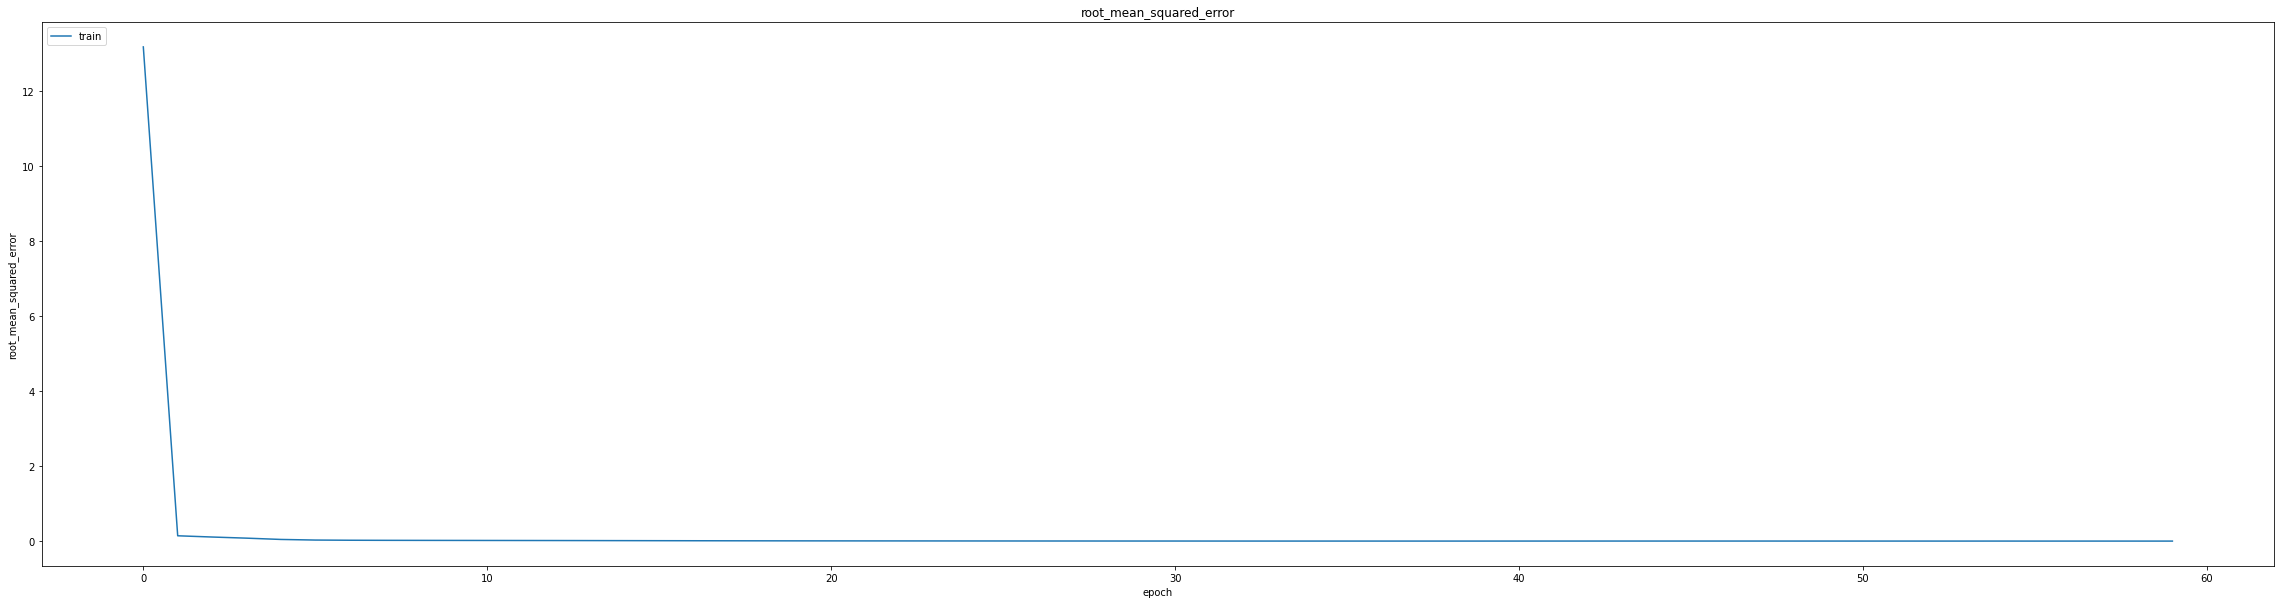

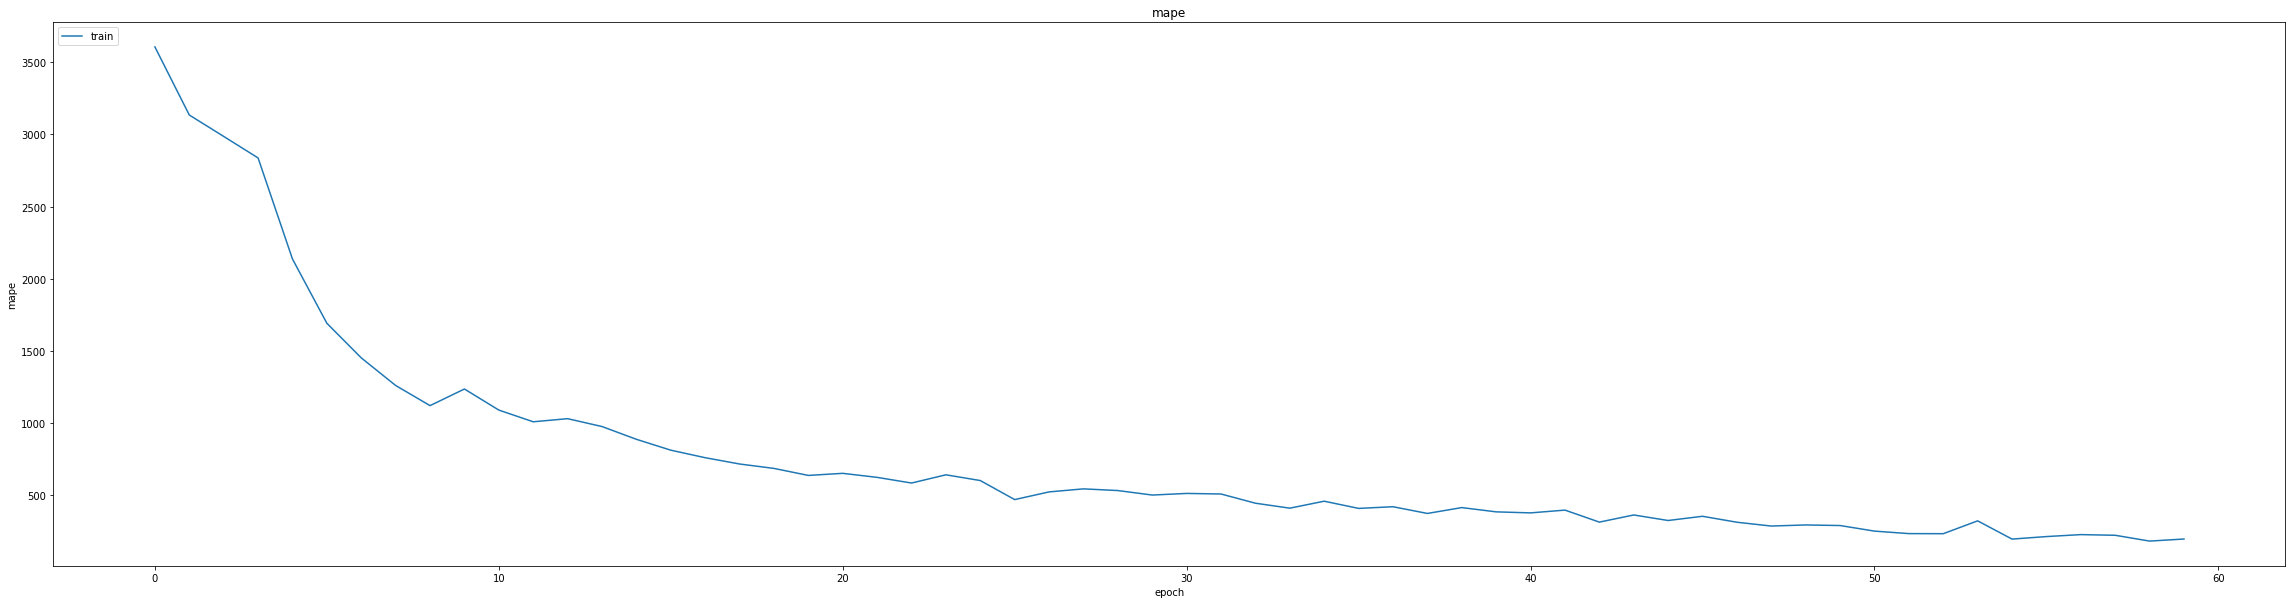

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.020503852516412735
0.023098232224583626
687/687 [==============================] - 21s 29ms/step
0.9758581979465888


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:

early_stopping = EarlyStopping(monitor='val_mse', patience=12)

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 2.8289e-04 - mae: 0.0070 - mse: 2.8289e-04 - root_mean_squared_error: 0.0168 - mape: 310.8954
Epoch 1: val_mse did not improve from 0.00053
463/463 [==============================] - 268s 572ms/step - loss: 2.8289e-04 - mae: 0.0070 - mse: 2.8289e-04 - root_mean_squared_error: 0.0168 - mape: 310.8954 - val_loss: 8.8327e-04 - val_mae: 0.0271 - val_mse: 8.8327e-04 - val_root_mean_squared_error: 0.0297 - val_mape: 2394.0759 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 1.6504e-05 - mae: 0.0030 - mse: 1.6504e-05 - root_mean_squared_error: 0.0041 - mape: 285.9151
Epoch 2: val_mse did not improve from 0.00053
463/463 [==============================] - 258s 558ms/step - loss: 1.6504e-05 - mae: 0.0030 - mse: 1.6504e-05 - root_mean_squared_error: 0.0041 - mape: 285.9151 - val_loss: 8.0044e-04 - val_mae: 0.0254 - val_mse: 8.0044e-04 - val_root_mean_squared_error: 0.0283 - val_mape: 2222.2476

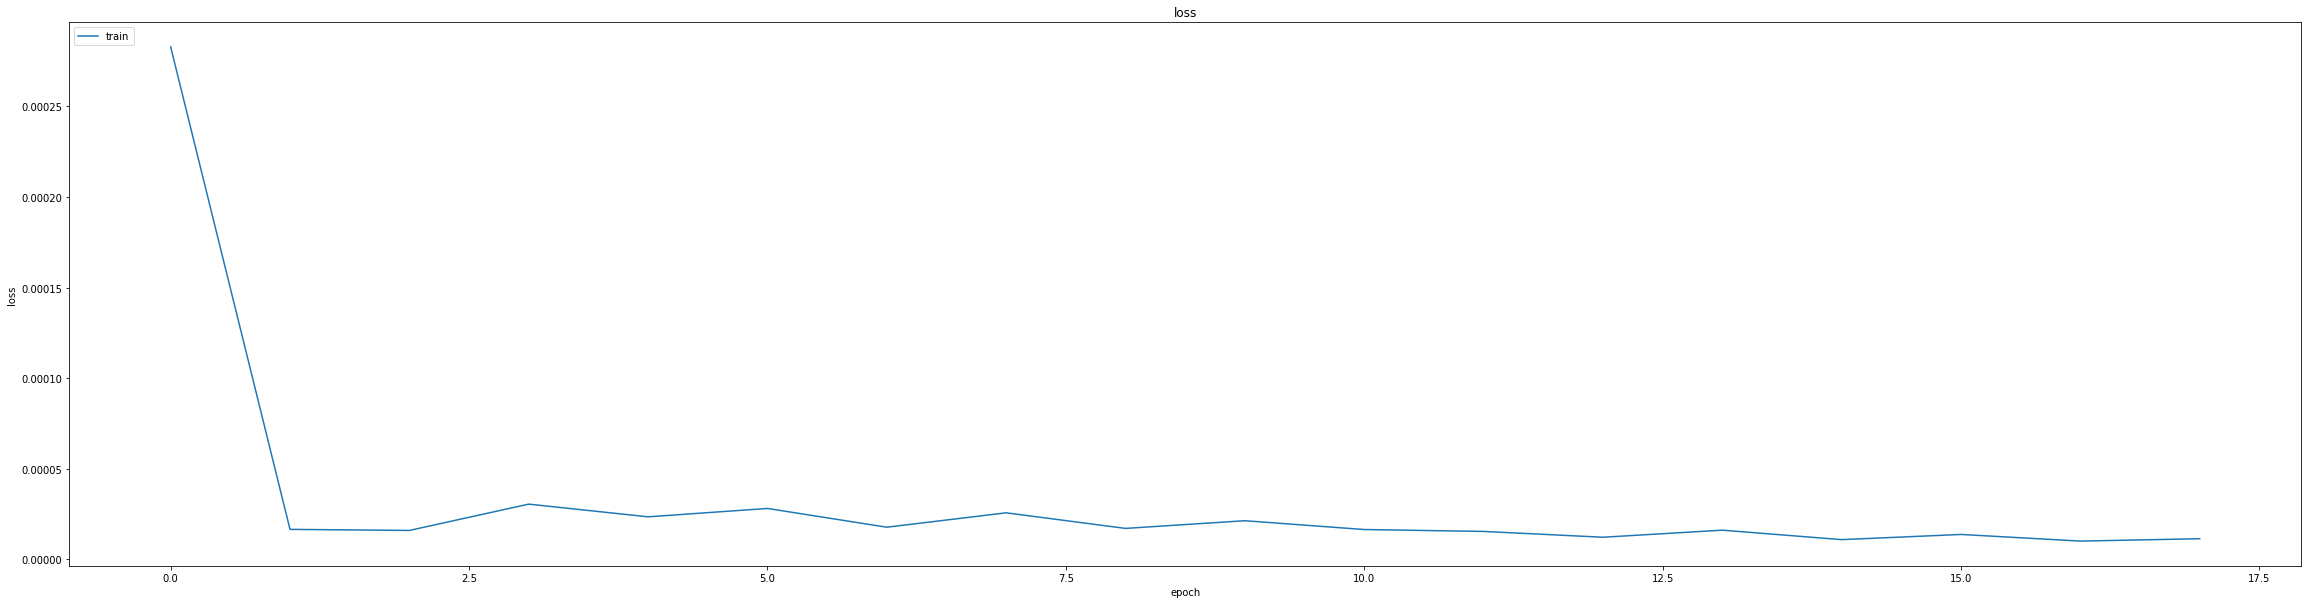

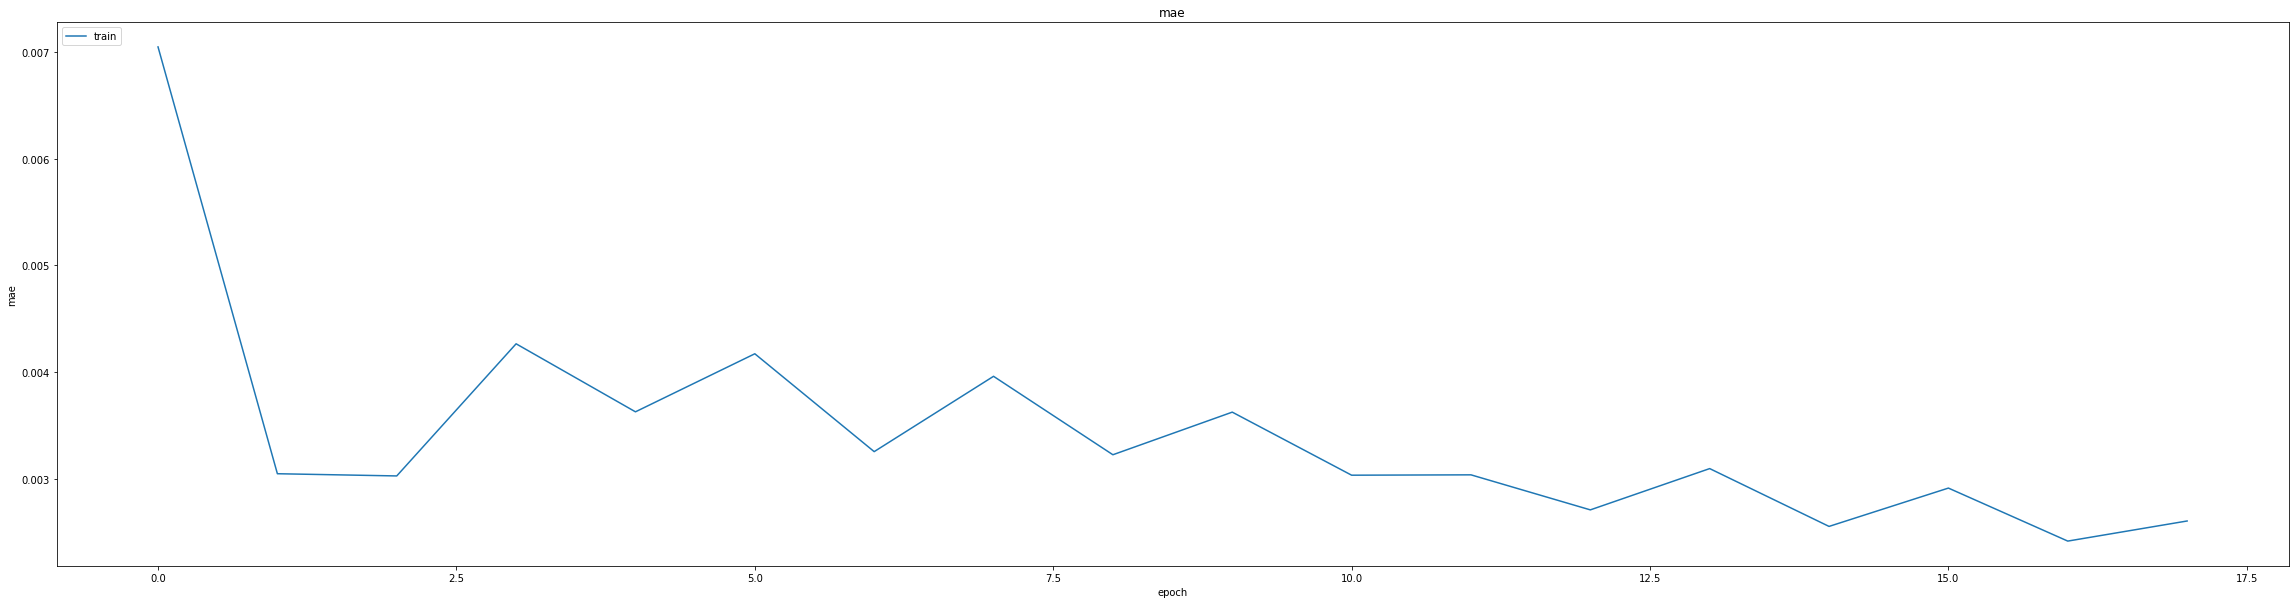

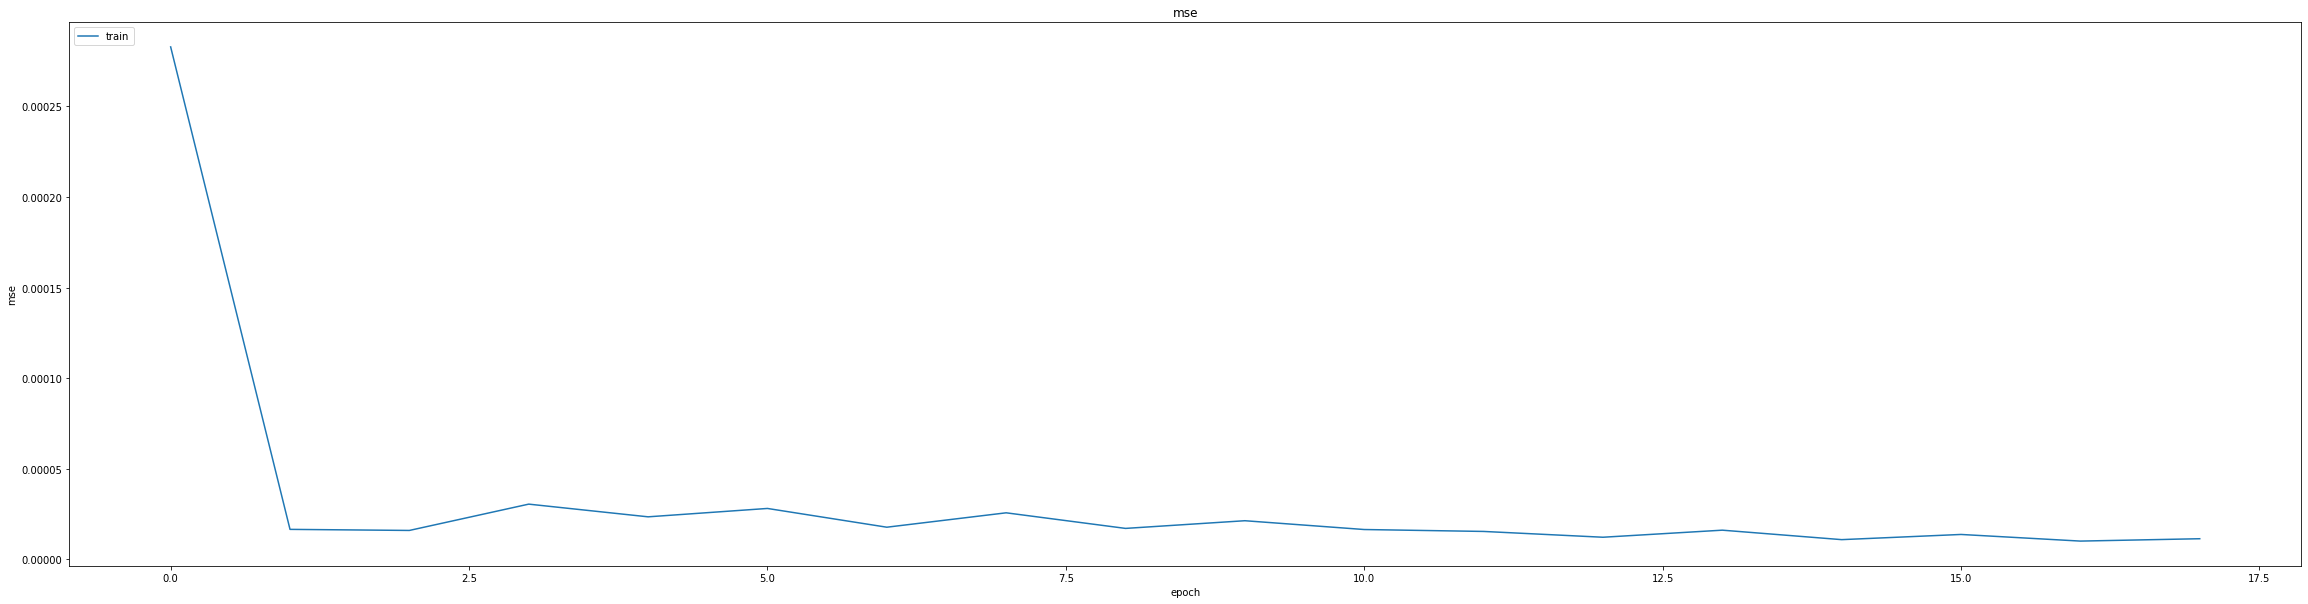

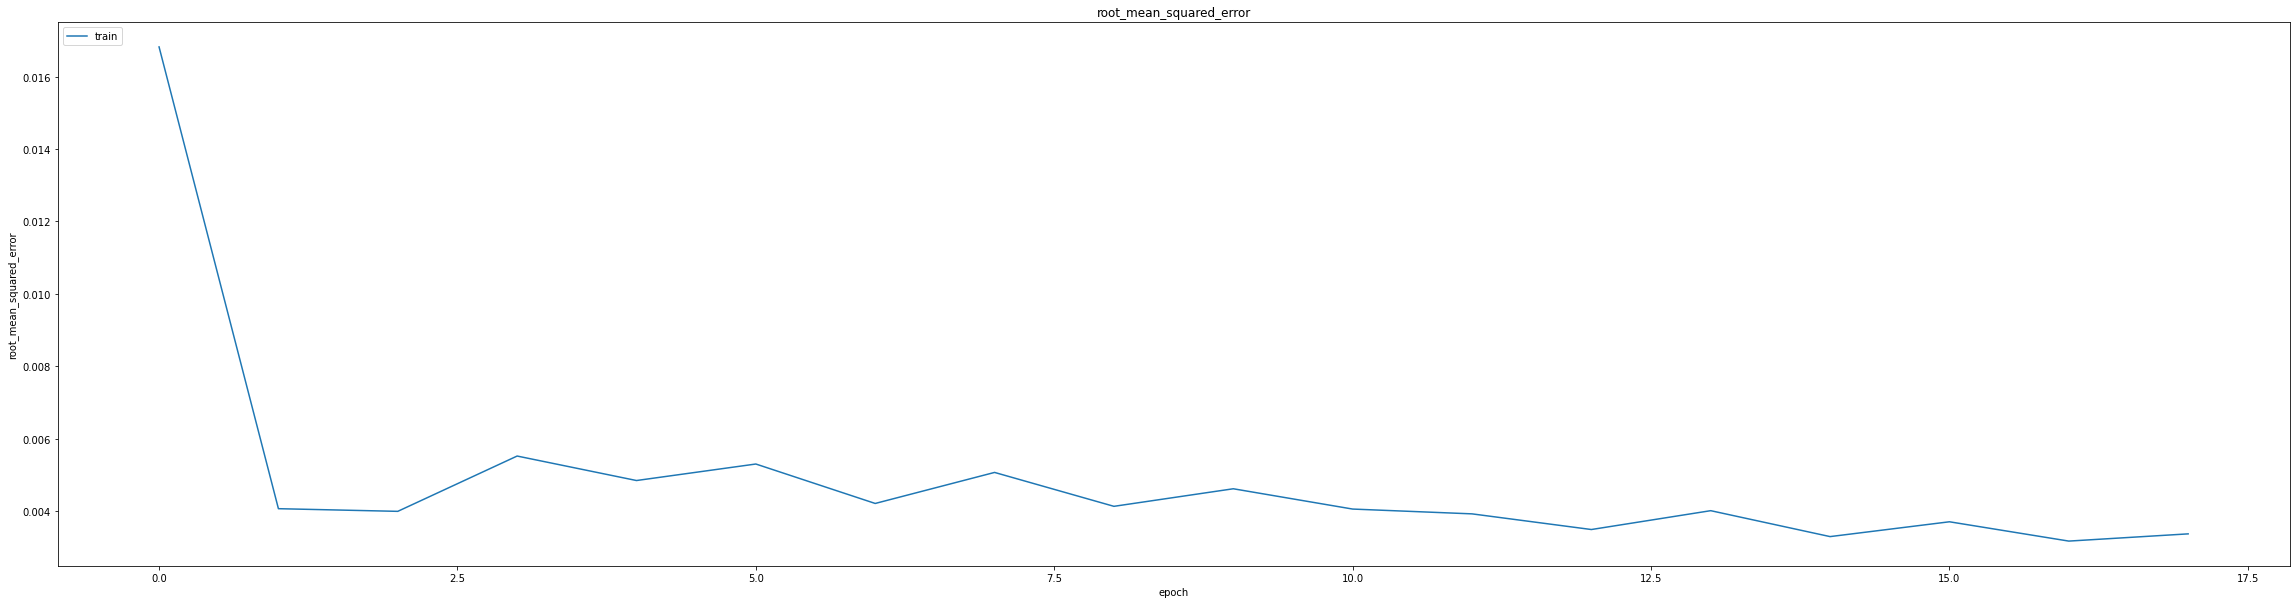

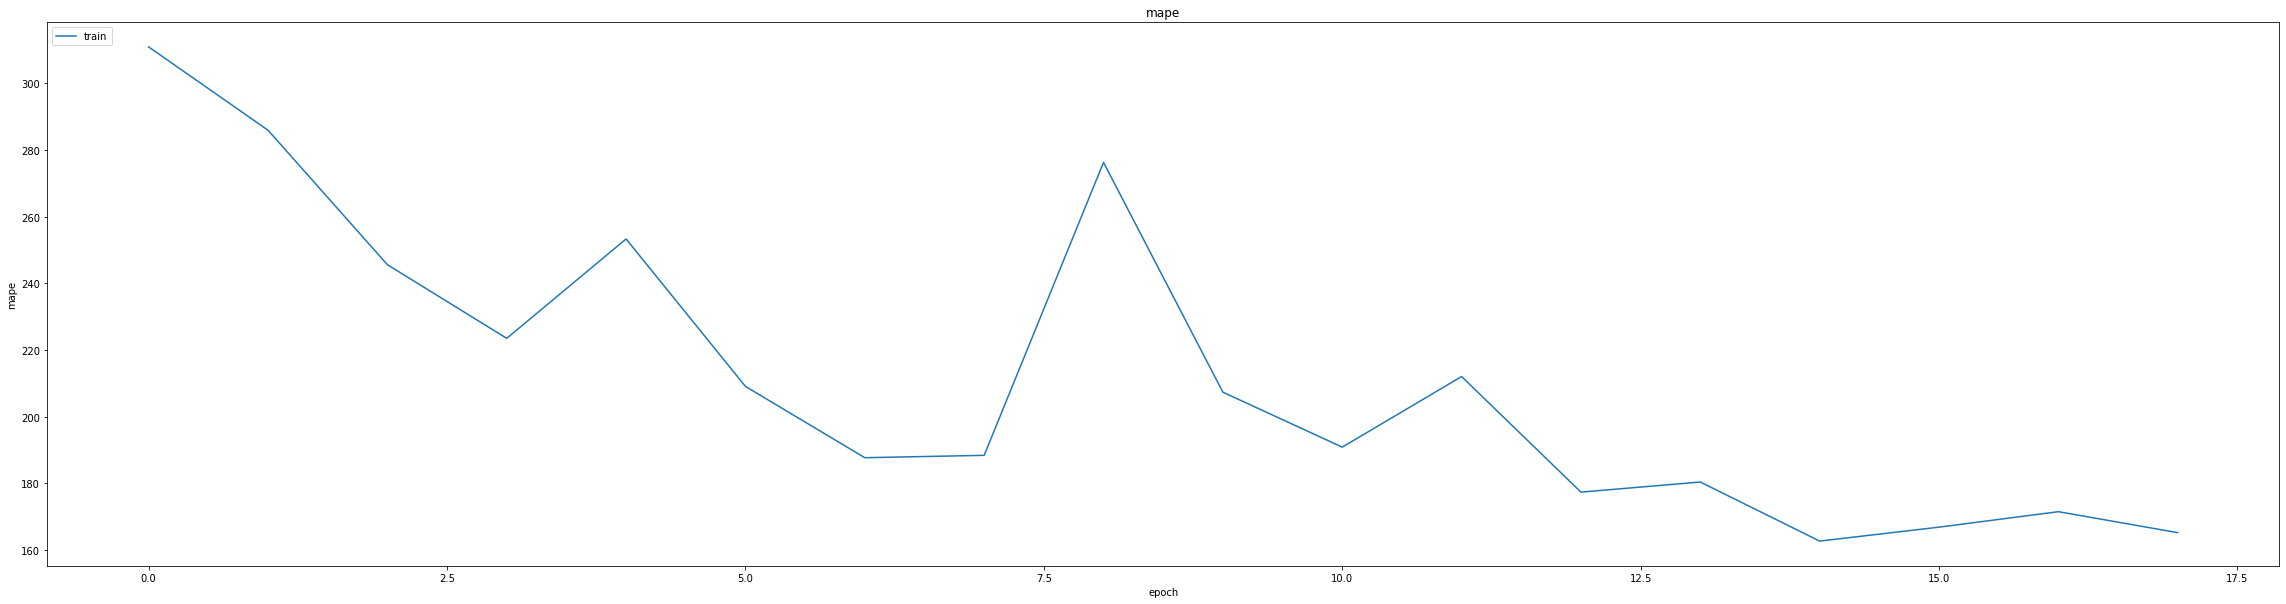

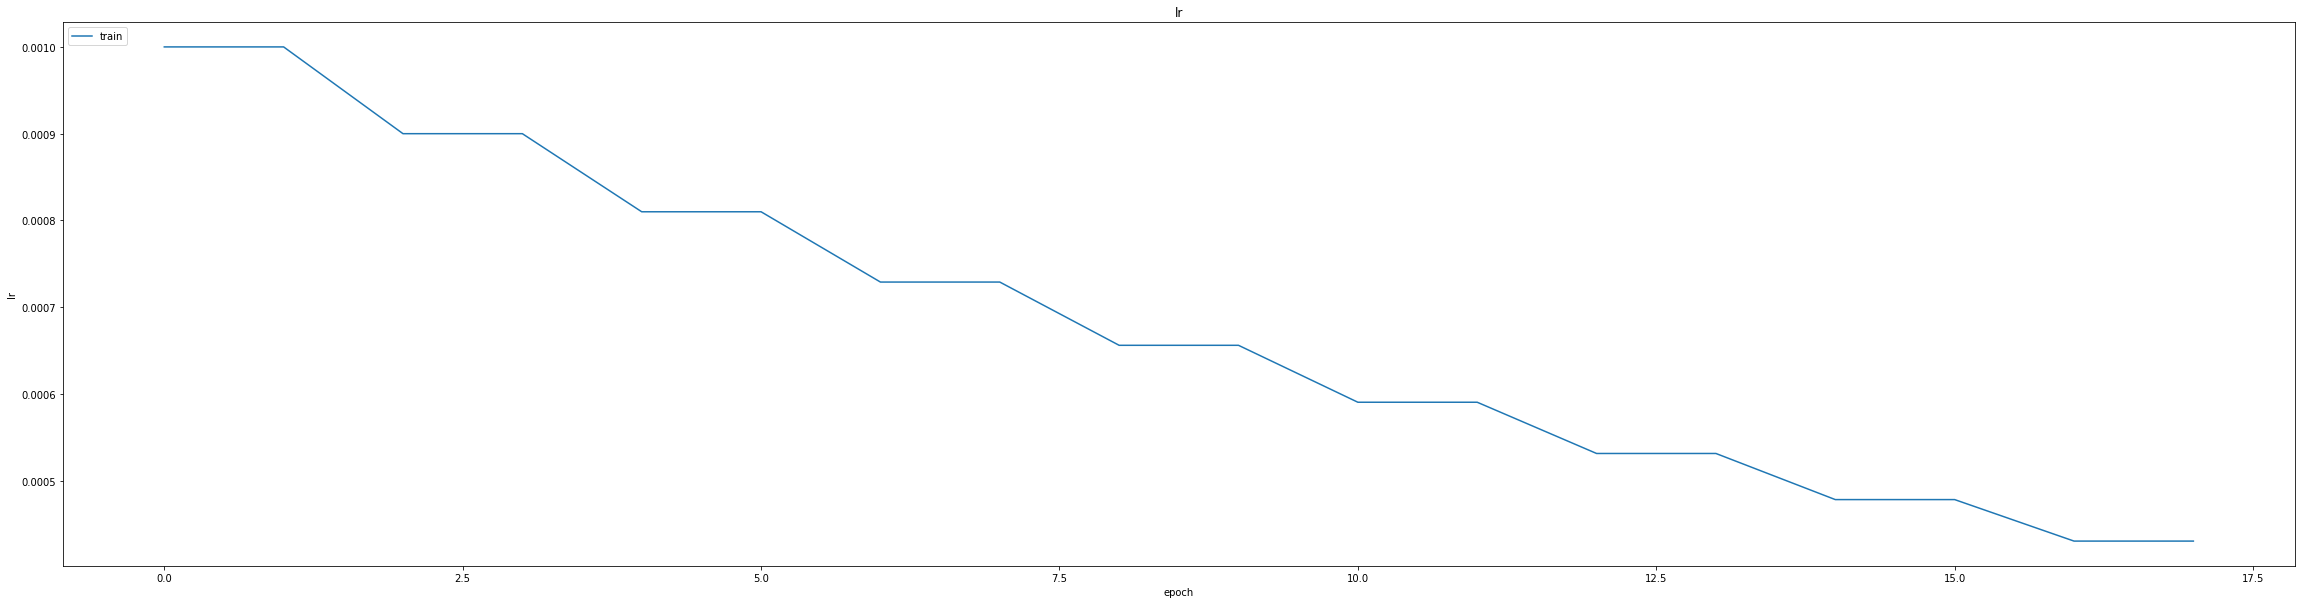

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:

print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.021817779168486595
0.02419494464993477
687/687 [==============================] - 24s 33ms/step
0.9770162369993395


In [ ]:
model.load_weights("weights.best.hdf5")

687/687 [==============================] - 22s 31ms/step


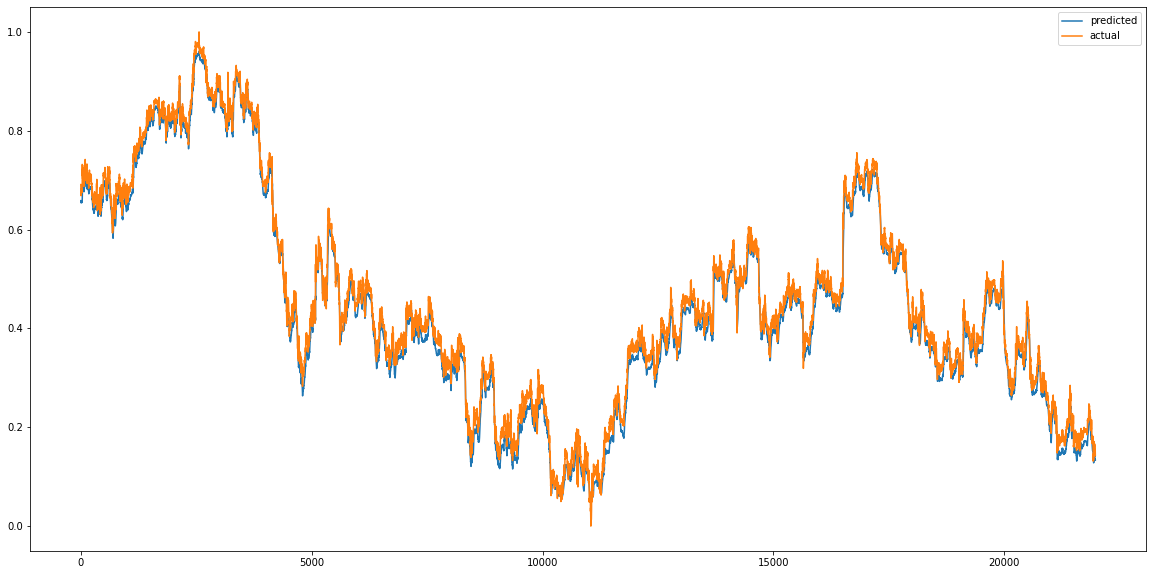

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


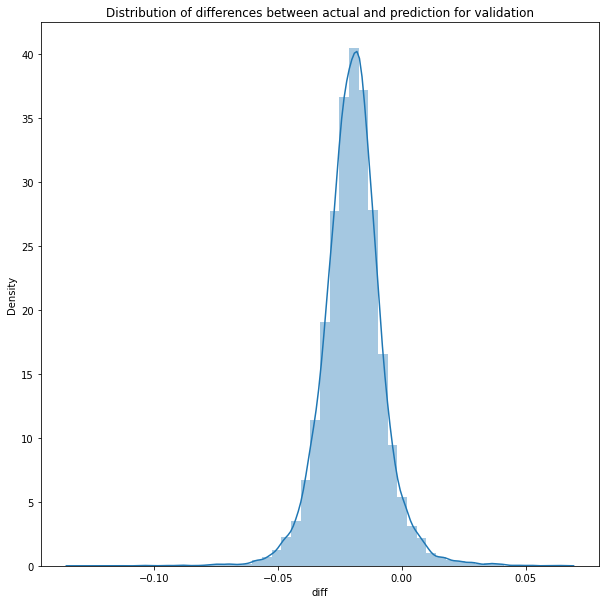

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 20s 28ms/step


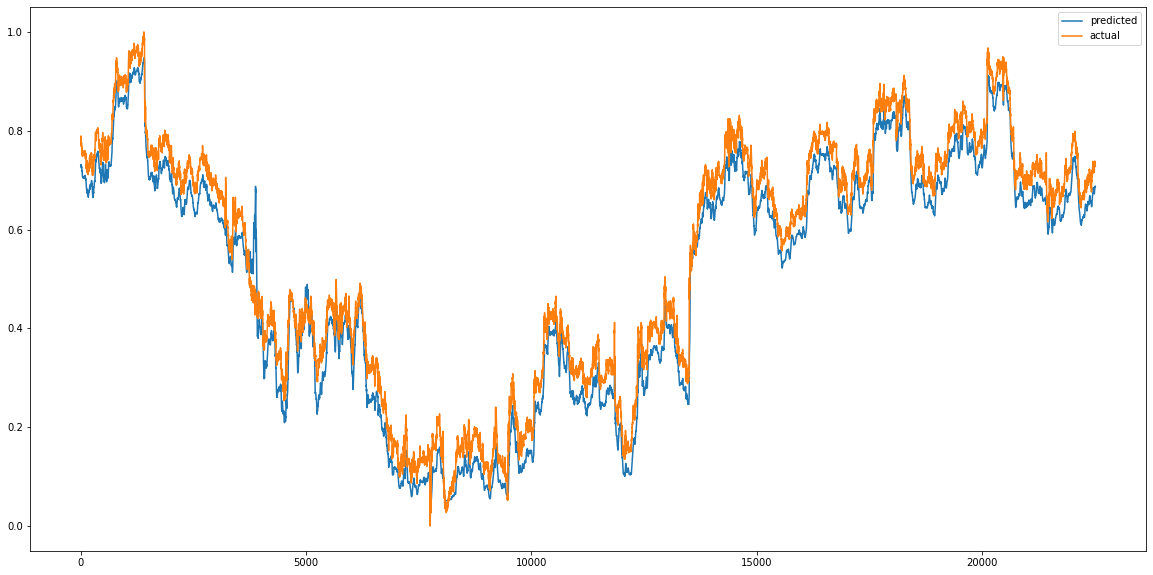

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


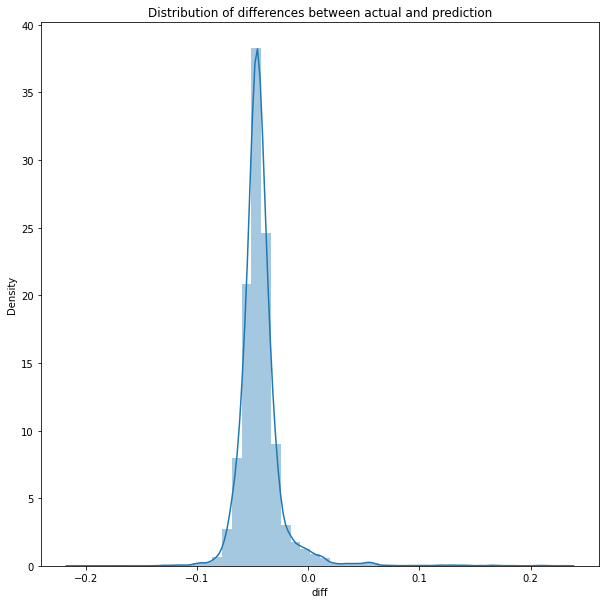

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0023117521992693903
MAE :  0.04563628613359077
RMSE :  0.04808068426373933
704/704 [==============================] - 20s 29ms/step
R2_Score  : 0.9770162369993395


count    22513.000000
mean        -0.043744
std          0.019955
min         -0.209852
25%         -0.052618
50%         -0.045718
75%         -0.038345
max          0.230667
Name: diff, dtype: float64